In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import seaborn as sns
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

Importing the datasets

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


In [4]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
recoveries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,131
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,39
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,2


In [6]:
confirmed.shape
deaths.shape
recoveries.shape
print('The shape of the confirmed cases is {}, that of the number of deaths is {} and for the recovered cases is {}.' .format(confirmed.shape, deaths.shape, recoveries.shape))

The shape of the confirmed cases is (263, 81), that of the number of deaths is (263, 81) and for the recovered cases is (249, 81).


We can see that the dataframe for the number of confirmed cases and the number of deaths have the same number of observations while that of the recoveries has fewer number of observations.

Get all the dates for the outbreak

Expanding the number of rows and columns that JupyterLab can display to maximum.

In [7]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [8]:
cols = confirmed.keys()
dfconfirmed = confirmed.loc[:, cols[4]:cols[-1]]
dfdeaths = deaths.loc[:, cols[4]:cols[-1]]
dfrecovered = recoveries.loc[:, cols[4]:cols[-1]]
dfrecovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2


In [9]:
dates = dfconfirmed.keys()
worldCases = []
totalDeaths = [] 
mortalityRate = []
recoveryRate = [] 
totalRecovered = [] 
totalActive = [] 
chinaCases = [] 
italyCases = []
spainCases = []
usCases = [] 
ukCases = []
iranCases = []
naijaCases = []
germanyCases = []
franceCases = []
belgiumCases = []
swissCases = []

for i in dates:
    sumConfirmed = dfconfirmed[i].sum()
    sumDeath = dfdeaths[i].sum()
    sumRecovered = dfrecovered[i].sum()
    
#   summing up the values of the confirmed, deaths, recovered, and active cases
    worldCases.append(sumConfirmed)
    totalDeaths.append(sumDeath)
    totalRecovered.append(sumRecovered)
    totalActive.append(sumConfirmed-sumDeath-sumRecovered)
    
    # calculate rates
    mortalityRate.append(sumDeath/sumConfirmed)
    recoveryRate.append(sumRecovered/sumConfirmed)

    # case studies 
    chinaCases.append(confirmed[confirmed['Country/Region']=='China'][i].sum())
    italyCases.append(confirmed[confirmed['Country/Region']=='Italy'][i].sum())
    spainCases.append(confirmed[confirmed['Country/Region']=='Spain'][i].sum())
    usCases.append(confirmed[confirmed['Country/Region']=='US'][i].sum())
    ukCases.append(confirmed[confirmed['Country/Region']=='United Kingdom'][i].sum())
    iranCases.append(confirmed[confirmed['Country/Region']=='Iran'][i].sum())
    naijaCases.append(confirmed[confirmed['Country/Region']=='Nigeria'][i].sum)
    germanyCases.append(confirmed[confirmed['Country/Region']=='Germany'][i].sum)
    franceCases.append(confirmed[confirmed['Country/Region']=='France'][i].sum)
    belgiumCases.append(confirmed[confirmed['Country/Region']=='Belgium'][i].sum)
    swissCases.append(confirmed[confirmed['Country/Region']=='Switzerland'][i].sum)

Getting daily increases for case study countries

In [10]:
def dailyIncrease(data):
    daily = [] 
    for i in range(len(data)):
        if i == 0:
            daily.append(data[0])
        else:
            daily.append(data[i]-data[i-1])
    return daily 

worldDailyIncrease = dailyIncrease(worldCases)
chinaDailyIncrease = dailyIncrease(chinaCases)
italyDailyIncrease = dailyIncrease(italyCases)
spainDailyIncrease = dailyIncrease(spainCases)
usDailyIncrease = dailyIncrease(usCases)
ukDailyIncrease = dailyIncrease(ukCases)
iranDailyIncrease = dailyIncrease(iranCases)

***All Cases

In [11]:
fromDayZero = np.array([i for i in range(len(dates))]).reshape(-1, 1)
worldCases = np.array(worldCases).reshape(-1, 1)
totalDeaths = np.array(totalDeaths).reshape(-1, 1)
totalRecovered = np.array(totalRecovered).reshape(-1, 1)

In [12]:
latestConfirmed = dfconfirmed[dates[-1]]
latestDeaths = dfdeaths[dates[-1]]
latestRecoveries = dfrecovered[dates[-1]]

***On Confirmed cases

Getting all countries/regions that have confirmed coronavirus cases

In [13]:
uniqueCountries =  list(confirmed['Country/Region'].unique())
uniqueCountries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [14]:
countryConfirmedCases = []
noCases = []
for i in uniqueCountries:
    cases = latestConfirmed[confirmed['Country/Region']==i].sum()
    if cases > 0:
        countryConfirmedCases.append(cases)
    else:
        noCases.append(i)
        
for i in noCases:
    uniqueCountries.remove(i)
    
# sort countries by the number of confirmed cases
uniqueCountries = [k for k, v in sorted(zip(uniqueCountries, countryConfirmedCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueCountries)):
    countryConfirmedCases[i] = latestConfirmed[confirmed['Country/Region']==uniqueCountries[i]].sum()

In [15]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(uniqueCountries)):
    print(f'{uniqueCountries[i]}: {countryConfirmedCases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 396223 cases
Spain: 141942 cases
Italy: 135586 cases
France: 110065 cases
Germany: 107663 cases
China: 82718 cases
Iran: 62589 cases
United Kingdom: 55949 cases
Turkey: 34109 cases
Switzerland: 22253 cases
Belgium: 22194 cases
Netherlands: 19709 cases
Canada: 17872 cases
Brazil: 14034 cases
Austria: 12639 cases
Portugal: 12442 cases
Korea, South: 10331 cases
Israel: 9248 cases
Sweden: 7693 cases
Russia: 7497 cases
Norway: 6086 cases
Australia: 5895 cases
Ireland: 5709 cases
India: 5311 cases
Denmark: 5266 cases
Chile: 5116 cases
Czechia: 5017 cases
Poland: 4848 cases
Romania: 4417 cases
Pakistan: 4035 cases
Malaysia: 3963 cases
Japan: 3906 cases
Philippines: 3764 cases
Ecuador: 3747 cases
Luxembourg: 2970 cases
Peru: 2954 cases
Saudi Arabia: 2795 cases
Indonesia: 2738 cases
Serbia: 2447 cases
Mexico: 2439 cases
United Arab Emirates: 2359 cases
Finland: 2308 cases
Thailand: 2258 cases
Panama: 2100 cases
Qatar: 2057 cases
Dominican Republic: 1956

In [16]:
uniqueProvinces =  list(confirmed['Province/State'].unique())
uniqueProvinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Island

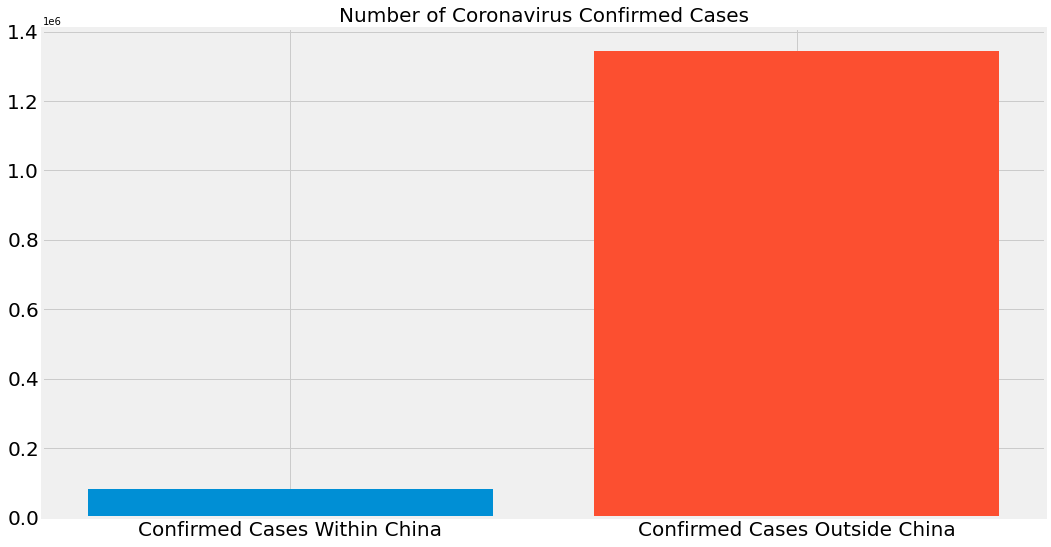

In [17]:
chinaConfirmed = latestConfirmed[confirmed['Country/Region']=='China'].sum()
confirmedOutsideChina = np.sum(countryConfirmedCases) - chinaConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within China', chinaConfirmed)
plt.bar('Confirmed Cases Outside China', confirmedOutsideChina)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [18]:
percentOutsideChina = (confirmedOutsideChina/(confirmedOutsideChina + chinaConfirmed)) * 100
percentChina = (chinaConfirmed/(confirmedOutsideChina + chinaConfirmed)) * 100
print('Confirmed Cases Outside China: {} cases (that is about {:.2f}% of total world cases)'.format(confirmedOutsideChina, percentOutsideChina))
print('Confirmed Cases Within China: {} cases (that is about {:.2f}% of total world cases)'.format(chinaConfirmed, percentChina))
print('Total: {} cases'.format(chinaConfirmed + confirmedOutsideChina))

Confirmed Cases Outside China: 1343378 cases (that is about 94.20% of total world cases)
Confirmed Cases Within China: 82718 cases (that is about 5.80% of total world cases)
Total: 1426096 cases


Ten (10) countires with the highest cases in the world

In [19]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visualUniqueCountries = [] 
visualConfirmedCases = []
others = np.sum(countryConfirmedCases[10:])

for i in range(len(countryConfirmedCases[:10])):
    visualUniqueCountries.append(uniqueCountries[i])
    visualConfirmedCases.append(countryConfirmedCases[i])
    
visualUniqueCountries.append('Others')
visualConfirmedCases.append(others)

***Visual Representations***

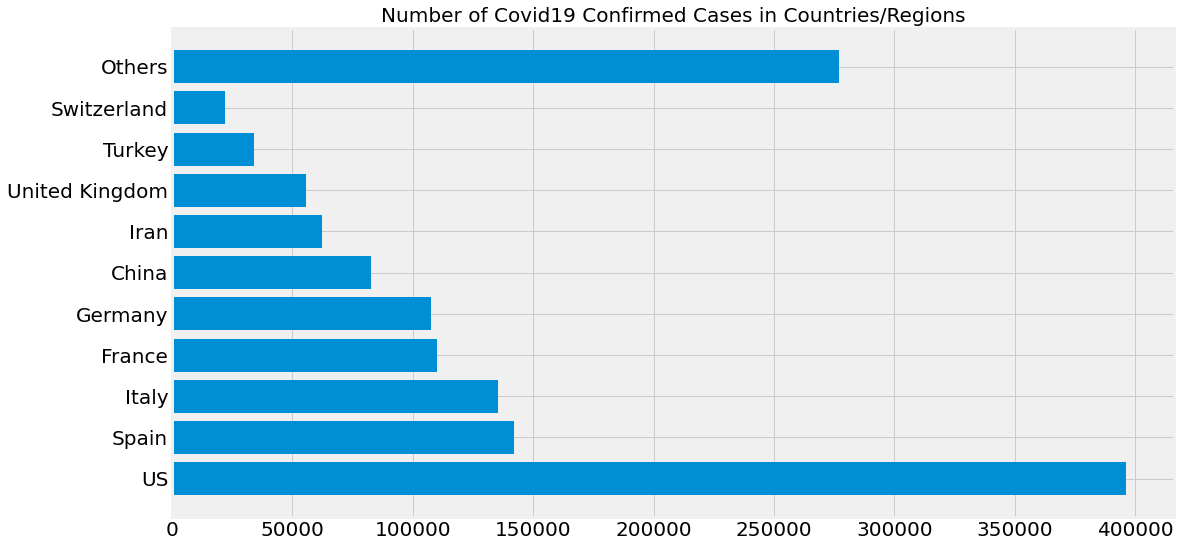

In [20]:
plt.figure(figsize=(16, 9))
plt.barh(visualUniqueCountries, visualConfirmedCases)
plt.title('Number of Covid19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

***Death Cases***

In [21]:
countryDeathCases = []
noCases = []
for i in uniqueCountries:
    cases = latestDeaths[deaths['Country/Region']==i].sum()
    if cases > 0:
        countryDeathCases.append(cases)
    else:
        noCases.append(i)
        
for i in noCases:
    uniqueCountries.remove(i)
    
# sort countries by the number of confirmed cases
uniqueCountries = [k for k, v in sorted(zip(uniqueCountries, countryDeathCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueCountries)):
    countryDeathCases[i] = latestDeaths[deaths['Country/Region']==uniqueCountries[i]].sum()

In [22]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(uniqueCountries)):
    print(f'{uniqueCountries[i]}: {countryDeathCases[i]} death cases')

Confirmed Cases by Countries/Regions:
Italy: 17127 death cases
Spain: 14045 death cases
US: 12722 death cases
France: 10343 death cases
United Kingdom: 6171 death cases
Iran: 3872 death cases
China: 3335 death cases
Netherlands: 2108 death cases
Belgium: 2035 death cases
Germany: 2016 death cases
Switzerland: 821 death cases
Turkey: 725 death cases
Brazil: 686 death cases
Sweden: 591 death cases
Canada: 375 death cases
Portugal: 345 death cases
Austria: 243 death cases
Indonesia: 221 death cases
Ireland: 210 death cases
Denmark: 203 death cases
Romania: 197 death cases
Algeria: 193 death cases
Korea, South: 192 death cases
Ecuador: 191 death cases
Philippines: 177 death cases
India: 150 death cases
Poland: 129 death cases
Mexico: 125 death cases
Peru: 107 death cases
Dominican Republic: 98 death cases
Egypt: 94 death cases
Japan: 92 death cases
Morocco: 90 death cases
Norway: 89 death cases
Czechia: 88 death cases
Greece: 81 death cases
Israel: 65 death cases
Iraq: 65 death cases
Malay

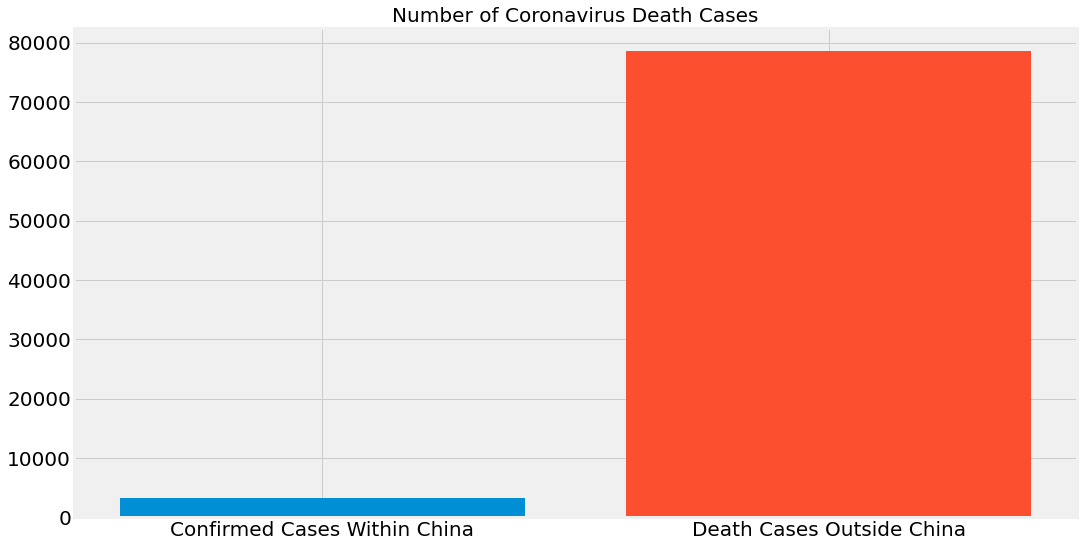

In [23]:
chinaDeaths = latestDeaths[deaths['Country/Region']=='China'].sum()
deathsOutsideChina = np.sum(countryDeathCases) - chinaDeaths
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within China', chinaDeaths)
plt.bar('Death Cases Outside China', deathsOutsideChina)
plt.title('Number of Coronavirus Death Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [24]:
percentDeathsOutsideChina = (deathsOutsideChina/(deathsOutsideChina + chinaDeaths)) * 100
percentDeathsChina = (chinaDeaths/(deathsOutsideChina + chinaDeaths)) * 100
ChinaDeathRate = (chinaDeaths/chinaConfirmed) * 100
print('Deaths Outside China: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideChina, percentDeathsOutsideChina))
print('Deaths Within China: {} deaths (that is about {:.2f}% of total world death cases)'.format(chinaDeaths, percentDeathsChina))
print('Total: {} deaths'.format(chinaDeaths + deathsOutsideChina))
print('The Death Rate within China is {:.2f}%'.format(ChinaDeathRate))

Deaths Outside China: 78530 deaths (that is about 95.93% of total world death cases)
Deaths Within China: 3335 deaths (that is about 4.07% of total world death cases)
Total: 81865 deaths
The Death Rate within China is 4.03%


Ten (10) countires with the highest cases death in the world

In [25]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visualUniqueCountries = [] 
visualDeathCases = []
others = np.sum(countryDeathCases[10:])

for i in range(len(countryDeathCases[:10])):
    visualUniqueCountries.append(uniqueCountries[i])
    visualDeathCases.append(countryDeathCases[i])
    
visualUniqueCountries.append('Others')
visualDeathCases.append(others)

***Visual Representations***

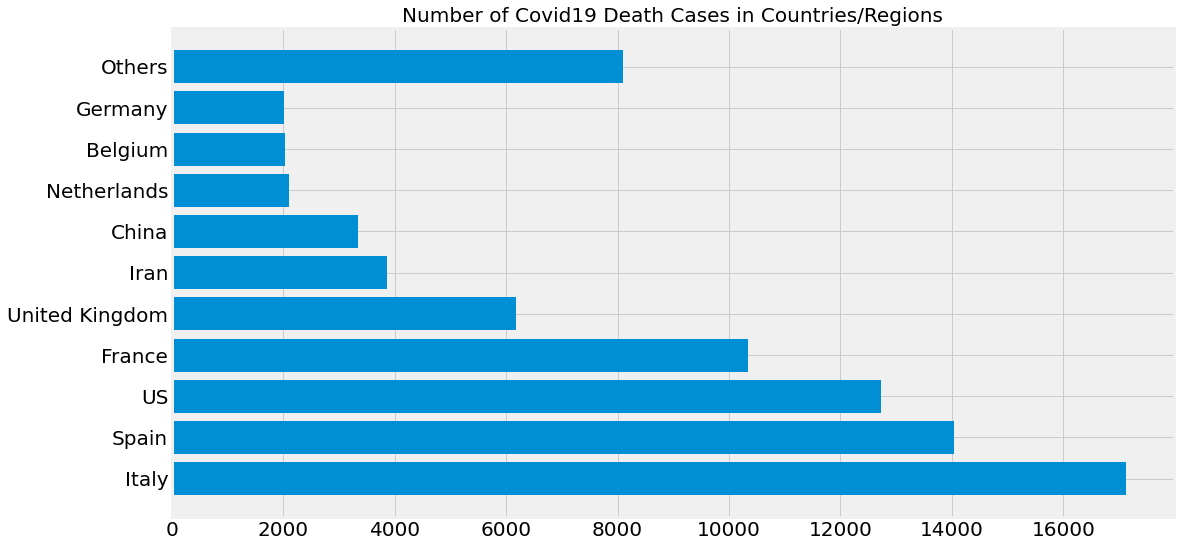

In [26]:
plt.figure(figsize=(16, 9))
plt.barh(visualUniqueCountries, visualDeathCases)
plt.title('Number of Covid19 Death Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Recovery Cases

In [27]:
countryRecoveryCases = []
noCases = []
for i in uniqueCountries:
    cases = latestRecoveries[recoveries['Country/Region']==i].sum()
    if cases > 0:
        countryRecoveryCases.append(cases)
    else:
        noCases.append(i)
        
for i in noCases:
    uniqueCountries.remove(i)
    
# sort countries by the number of confirmed cases
uniqueCountries = [k for k, v in sorted(zip(uniqueCountries, countryRecoveryCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueCountries)):
    countryRecoveryCases[i] = latestRecoveries[recoveries['Country/Region']==uniqueCountries[i]].sum()

In [28]:
# number of cases per country/region
print('Recovery Cases by Countries/Regions:')
for i in range(len(uniqueCountries)):
    print(f'{uniqueCountries[i]}: {countryRecoveryCases[i]} recovery cases')

Recovery Cases by Countries/Regions:
China: 77410 recovery cases
Spain: 43208 recovery cases
Germany: 36081 recovery cases
Iran: 27039 recovery cases
Italy: 24392 recovery cases
US: 21763 recovery cases
France: 19523 recovery cases
Switzerland: 8704 recovery cases
Korea, South: 6694 recovery cases
Belgium: 4157 recovery cases
Austria: 4046 recovery cases
Canada: 3791 recovery cases
Denmark: 1621 recovery cases
Turkey: 1582 recovery cases
Malaysia: 1321 recovery cases
Peru: 1301 recovery cases
Australia: 1080 recovery cases
Chile: 898 recovery cases
Thailand: 888 recovery cases
Israel: 770 recovery cases
Mexico: 633 recovery cases
Diamond Princess: 619 recovery cases
Saudi Arabia: 615 recovery cases
Japan: 592 recovery cases
Iceland: 559 recovery cases
Luxembourg: 500 recovery cases
Russia: 494 recovery cases
Romania: 460 recovery cases
Bahrain: 458 recovery cases
Pakistan: 429 recovery cases
India: 421 recovery cases
Singapore: 377 recovery cases
Iraq: 373 recovery cases
Argentina: 338

Getting the latest information about provinces/states that have recovered coronavirus cases

In [29]:
provinceRecoveryCases = []
noCases = [] 
for i in uniqueProvinces:
    cases = latestRecoveries[recoveries['Province/State']==i].sum()
    if cases > 0:
        provinceRecoveryCases.append(cases)
    else:
        noCases.append(i)
 
# remove areas with no confirmed cases
for i in noCases:
    uniqueProvinces.remove(i)
    
uniqueProvinces = [k for k, v in sorted(zip(uniqueProvinces, provinceRecoveryCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueProvinces)):
    provinceRecoveryCases[i] = latestRecoveries[recoveries['Province/State']==uniqueProvinces[i]].sum()

In [30]:
# number of cases per province/state/city
print('Death Cases by Province/States:')
for i in range(len(uniqueProvinces)):
    print(f'{uniqueProvinces[i]}: {provinceRecoveryCases[i]} recovery cases')

Death Cases by Province/States:
Hubei: 64073 recovery cases
Guangdong: 1401 recovery cases
Henan: 1252 recovery cases
Zhejiang: 1230 recovery cases
Hunan: 1014 recovery cases
Anhui: 984 recovery cases
Jiangxi: 935 recovery cases
Shandong: 755 recovery cases
Jiangsu: 633 recovery cases
Victoria: 620 recovery cases
Chongqing: 570 recovery cases
Sichuan: 541 recovery cases
Heilongjiang: 469 recovery cases
Beijing: 448 recovery cases
Shanghai: 406 recovery cases
Hebei: 312 recovery cases
Fujian: 305 recovery cases
Guangxi: 252 recovery cases
Shaanxi: 246 recovery cases
Hong Kong: 216 recovery cases
Queensland: 173 recovery cases
Yunnan: 173 recovery cases
Western Australia: 162 recovery cases
Hainan: 162 recovery cases
Tianjin: 151 recovery cases
Guizhou: 144 recovery cases
Shanxi: 133 recovery cases
Gansu: 132 recovery cases
Liaoning: 130 recovery cases
Faroe Islands: 120 recovery cases
Jilin: 92 recovery cases
Ningxia: 75 recovery cases
Inner Mongolia: 74 recovery cases
Xinjiang: 73 reco

In [31]:
nanIndices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(uniqueProvinces)):
    if type(uniqueProvinces[i]) == float:
        nanIndices.append(i)

uniqueProvinces = list(uniqueProvinces)
provinceRecoveryCases = list(provinceRecoveryCases)

for i in nanIndices:
    uniqueProvinces.pop(i)
    provinceRecoveryCases.pop(i)

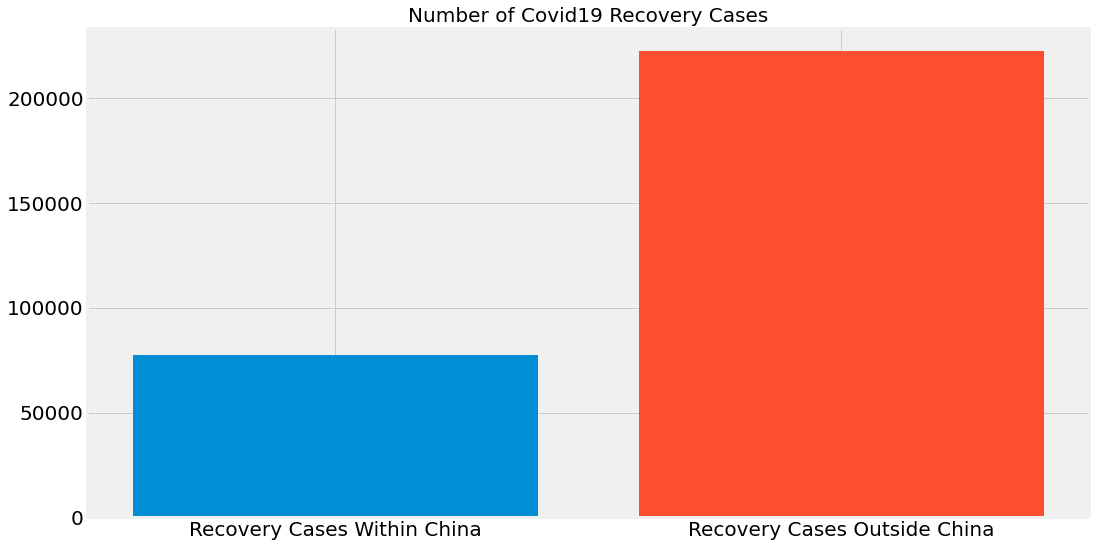

In [32]:
chinaRecoveries = latestRecoveries[recoveries['Country/Region']=='China'].sum()
recoveriesOutsideChina = np.sum(countryRecoveryCases) - chinaRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within China', chinaRecoveries)
plt.bar('Recovery Cases Outside China', recoveriesOutsideChina)
plt.title('Number of Covid19 Recovery Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [33]:
percentRecoveriesOutsideChina = (recoveriesOutsideChina/(recoveriesOutsideChina + chinaRecoveries)) * 100
percentRecoveriesChina = (chinaRecoveries/(recoveriesOutsideChina + chinaRecoveries)) * 100
ChinaRecoveryRate = (chinaRecoveries/chinaConfirmed) * 100
print('Recoveries Outside China: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideChina, percentRecoveriesOutsideChina))
print('Recoveries Within China: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(chinaRecoveries, percentRecoveriesChina))
print('Total: {} recoveries'.format(chinaRecoveries + recoveriesOutsideChina))
print("Recovery rate in China is {:.2f}%".format(ChinaRecoveryRate))

Recoveries Outside China: 222393 recoveries (that is about 74.18% of total world recovery cases)
Recoveries Within China: 77410 recoveries (that is about 25.82% of total world recovery cases)
Total: 299803 recoveries
Recovery rate in China is 93.58%


Ten countries with the highest recovery rates in the world

In [34]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visualUniqueCountries = [] 
visualRecoveryCases = []
others = np.sum(countryRecoveryCases[10:])

for i in range(len(countryRecoveryCases[:10])):
    visualUniqueCountries.append(uniqueCountries[i])
    visualRecoveryCases.append(countryRecoveryCases[i])
    
visualUniqueCountries.append('Others')
visualRecoveryCases.append(others)

***Visual Representations***

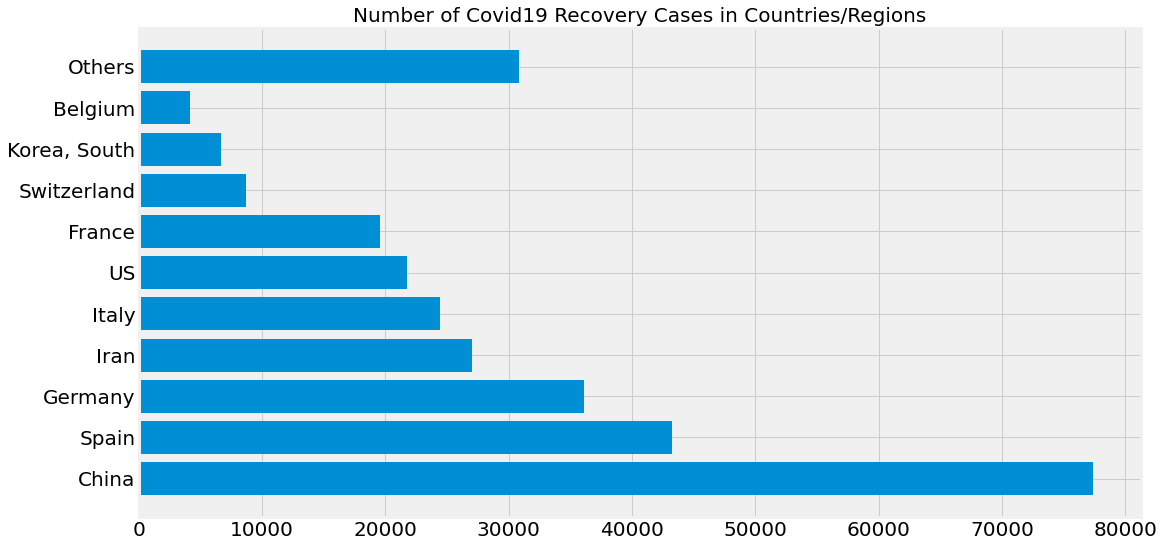

In [35]:
plt.figure(figsize=(16, 9))
plt.barh(visualUniqueCountries, visualRecoveryCases)
plt.title('Number of Covid19 Recovery Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

***United States Statistics: Confirmed, Death and Recovery

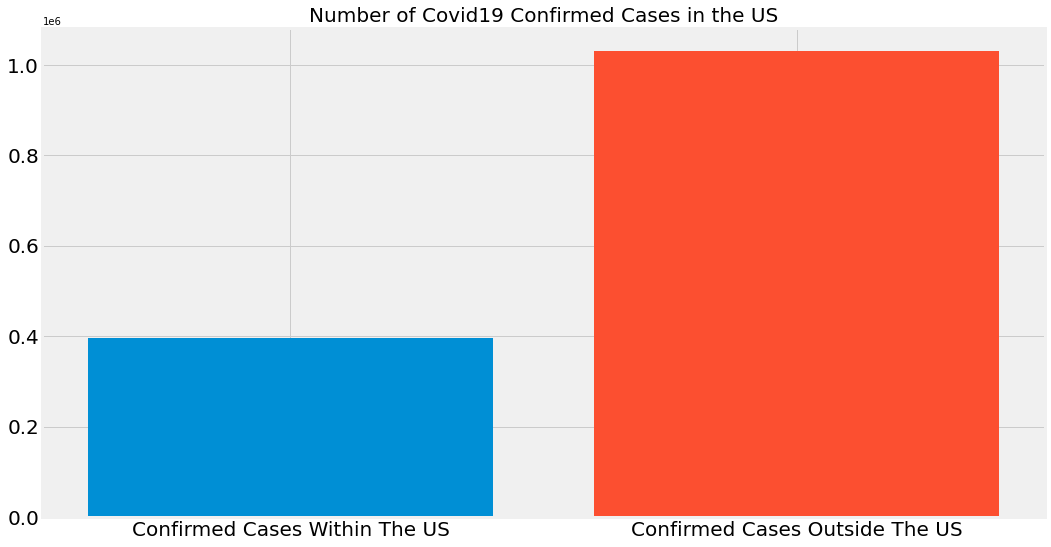

In [36]:
usConfirmed = latestConfirmed[confirmed['Country/Region']=='US'].sum()
confirmedOutsideUS = np.sum(countryConfirmedCases) - usConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within The US', usConfirmed)
plt.bar('Confirmed Cases Outside The US', confirmedOutsideUS)
plt.title('Number of Covid19 Confirmed Cases in the US', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [37]:
percentConfirmedOutsideUS = (confirmedOutsideUS/(confirmedOutsideUS + usConfirmed)) * 100
percentConfirmedUS = (usConfirmed/(confirmedOutsideUS + usConfirmed)) * 100
print('Confirmed Outside The United States: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideUS, percentConfirmedOutsideUS))
print('Confirmed Within The United States: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(usConfirmed, percentConfirmedUS))
print('Total: {} confirmed cases'.format(usConfirmed + confirmedOutsideUS))

Confirmed Outside The United States: 1029873 confirmed (that is about 72.22% of total world confirmed cases)
Confirmed Within The United States: 396223 confirmed (that is about 27.78% of total world confirmed cases)
Total: 1426096 confirmed cases


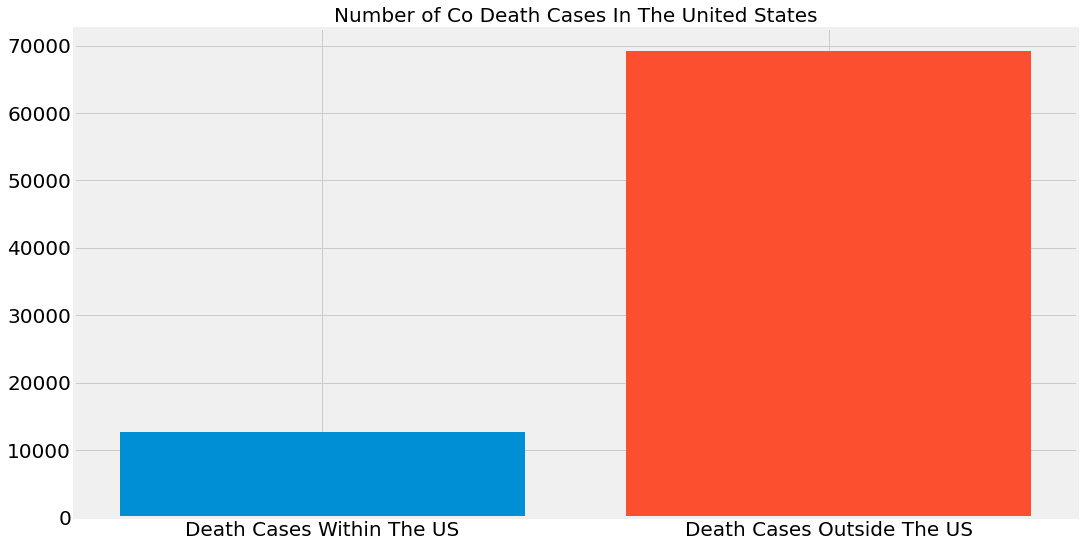

In [38]:
usDeaths = latestDeaths[deaths['Country/Region']=='US'].sum()
deathsOutsideUS = np.sum(countryDeathCases) - usDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within The US', usDeaths)
plt.bar('Death Cases Outside The US', deathsOutsideUS)
plt.title('Number of Co Death Cases In The United States', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [39]:
percentDeathsOutsideUS = (deathsOutsideUS/(deathsOutsideUS + usDeaths)) * 100
percentDeathsUS = (usDeaths/(deathsOutsideUS + usDeaths)) * 100
USDeathRate = (usDeaths/usConfirmed) * 100
print('Deaths Outside The US: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideUS, percentDeathsOutsideUS))
print('Deaths Within The US: {} deaths (that is about {:.2f}% of total world death cases)'.format(usDeaths, percentDeathsUS))
print('Total: {} deaths'.format(usDeaths + deathsOutsideUS))
print("Death rate in the United States is {:.2f}%".format(USDeathRate))

Deaths Outside The US: 69143 deaths (that is about 84.46% of total world death cases)
Deaths Within The US: 12722 deaths (that is about 15.54% of total world death cases)
Total: 81865 deaths
Death rate in the United States is 3.21%


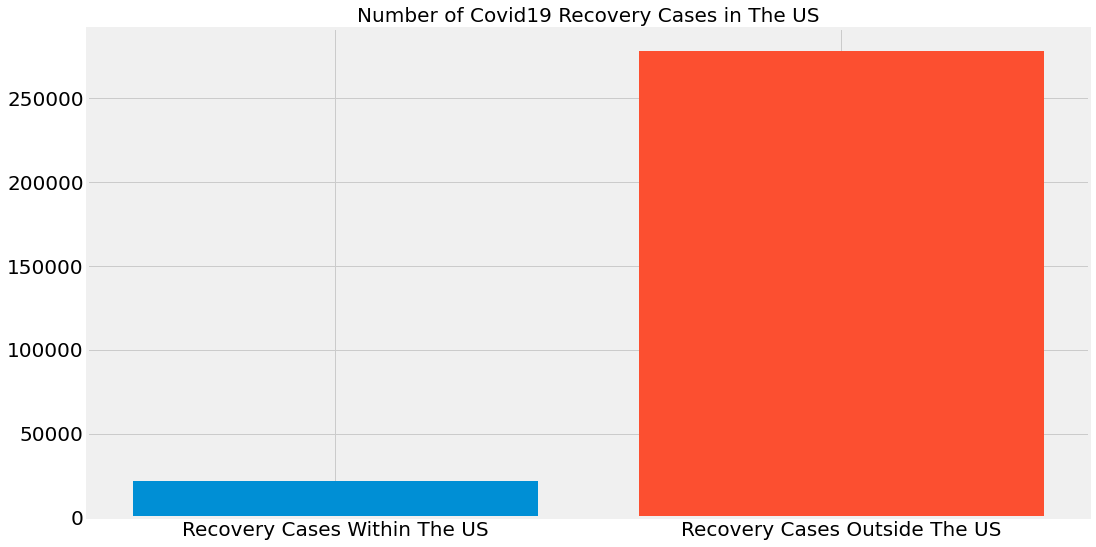

In [40]:
usRecoveries = latestRecoveries[recoveries['Country/Region']=='US'].sum()
recoveriesOutsideUS = np.sum(countryRecoveryCases) - usRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within The US', usRecoveries)
plt.bar('Recovery Cases Outside The US', recoveriesOutsideUS)
plt.title('Number of Covid19 Recovery Cases in The US', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [41]:
percentRecoveriesOutsideUS = (recoveriesOutsideUS/(recoveriesOutsideUS + usRecoveries)) * 100
percentRecoveriesUS = (usRecoveries/(recoveriesOutsideUS + usRecoveries)) * 100
USRecoveryRate = (usRecoveries/usConfirmed) * 100
print('Recoveries Outside The US: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideUS, percentRecoveriesOutsideUS))
print('Recoveries Within The US: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(usRecoveries, percentRecoveriesUS))
print('Total: {} recoveries'.format(usRecoveries + recoveriesOutsideUS))
print("Recovery rate in the United States is {:.2f}%".format(USRecoveryRate))

Recoveries Outside The US: 278040 recoveries (that is about 92.74% of total world recovery cases)
Recoveries Within The US: 21763 recoveries (that is about 7.26% of total world recovery cases)
Total: 299803 recoveries
Recovery rate in the United States is 5.49%


***United Kingdom Statistics

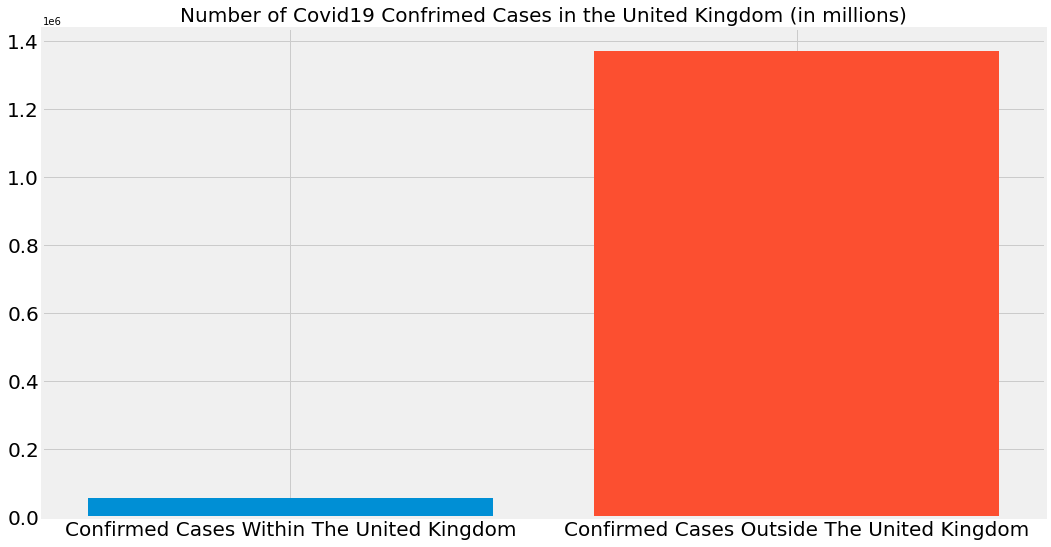

In [42]:
ukConfirmed = latestConfirmed[confirmed['Country/Region']=='United Kingdom'].sum()
confirmedOutsideUK = np.sum(countryConfirmedCases) - ukConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within The United Kingdom', ukConfirmed)
plt.bar('Confirmed Cases Outside The United Kingdom', confirmedOutsideUK)
plt.title('Number of Covid19 Confrimed Cases in the United Kingdom (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [43]:
percentConfirmedOutsideUK = (confirmedOutsideUK/(confirmedOutsideUK + ukConfirmed)) * 100
percentConfirmedUK = (ukConfirmed/(confirmedOutsideUK + ukConfirmed)) * 100
print('Confirmed Outside The United Kingdom: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideUK, percentConfirmedOutsideUK))
print('Confirmed Within The United Kingdom: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(ukConfirmed, percentConfirmedUK))
print('Total: {} confirmed cases'.format(ukConfirmed + confirmedOutsideUK))

Confirmed Outside The United Kingdom: 1370147 confirmed (that is about 96.08% of total world confirmed cases)
Confirmed Within The United Kingdom: 55949 confirmed (that is about 3.92% of total world confirmed cases)
Total: 1426096 confirmed cases


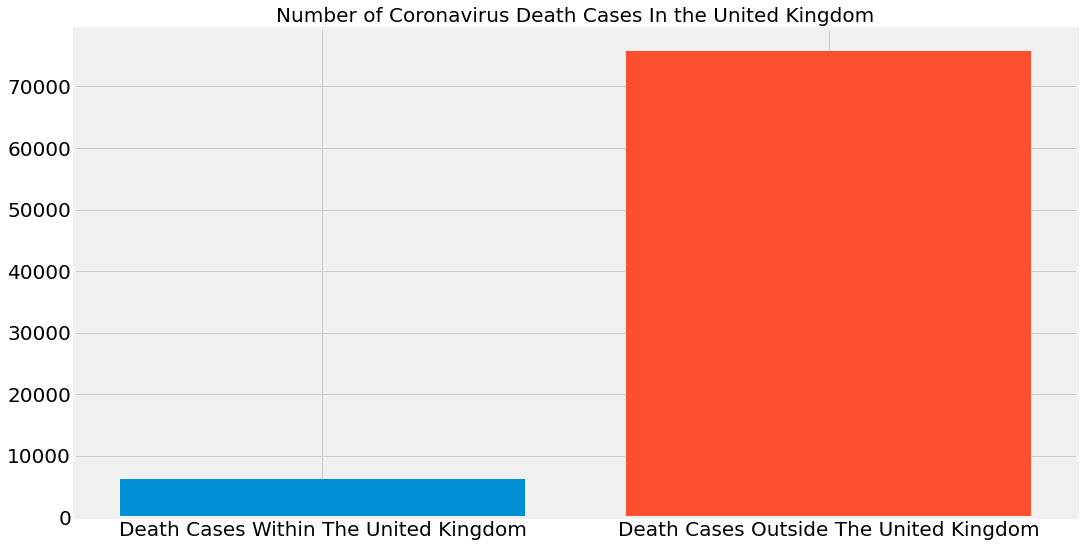

In [44]:
ukDeaths = latestDeaths[deaths['Country/Region']=='United Kingdom'].sum()
deathsOutsideUK = np.sum(countryDeathCases) - ukDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within The United Kingdom', ukDeaths)
plt.bar('Death Cases Outside The United Kingdom', deathsOutsideUK)
plt.title('Number of Coronavirus Death Cases In the United Kingdom', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [45]:
percentDeathsOutsideUK = (deathsOutsideUK/(deathsOutsideUK + ukDeaths)) * 100
percentDeathsUK = (ukDeaths/(deathsOutsideUK + ukDeaths)) * 100
UKDeathRate = (ukDeaths/ukConfirmed) * 100
print('Deaths Outside The United Kingdom: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideUK, percentDeathsOutsideUK))
print('Deaths Within The United Kingdom: {} deaths (that is about {:.2f}% of total world death cases)'.format(ukDeaths, percentDeathsUK))
print('Total: {} deaths'.format(ukDeaths + deathsOutsideUK))
print("Death rate in the United Kingdom is {:.2f}%".format(UKDeathRate))

Deaths Outside The United Kingdom: 75694 deaths (that is about 92.46% of total world death cases)
Deaths Within The United Kingdom: 6171 deaths (that is about 7.54% of total world death cases)
Total: 81865 deaths
Death rate in the United Kingdom is 11.03%


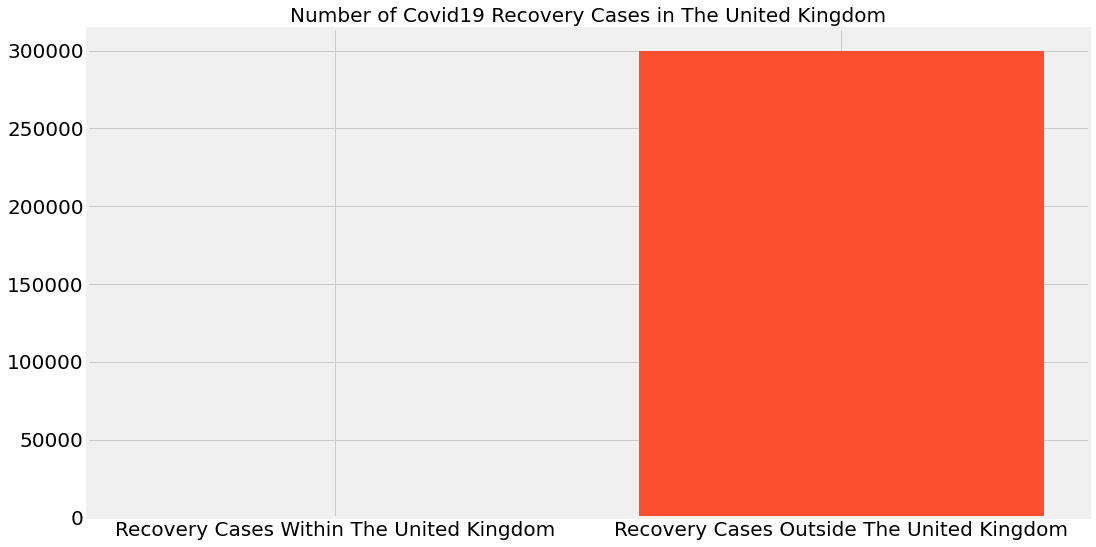

In [46]:
ukRecoveries = latestRecoveries[recoveries['Country/Region']=='United Kingdom'].sum()
recoveriesOutsideUK = np.sum(countryRecoveryCases) - ukRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within The United Kingdom', ukRecoveries)
plt.bar('Recovery Cases Outside The United Kingdom', recoveriesOutsideUK)
plt.title('Number of Covid19 Recovery Cases in The United Kingdom', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [47]:
percentRecoveriesOutsideUK = (recoveriesOutsideUK/(recoveriesOutsideUK + ukRecoveries)) * 100
percentRecoveriesUK = (ukRecoveries/(recoveriesOutsideUK + ukRecoveries)) * 100
UKRecoveryRate = (ukRecoveries/ukConfirmed) * 100
print('Recoveries Outside The United Kingdom: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideUK, percentRecoveriesOutsideUK))
print('Recoveries Within The United Kingdom: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(ukRecoveries, percentRecoveriesUK))
print('Total: {} recoveries'.format(ukRecoveries + recoveriesOutsideUK))
print("Recovery Rate In The United Kingdom is {:.2f}%".format(UKRecoveryRate))

Recoveries Outside The United Kingdom: 299478 recoveries (that is about 99.89% of total world recovery cases)
Recoveries Within The United Kingdom: 325 recoveries (that is about 0.11% of total world recovery cases)
Total: 299803 recoveries
Recovery Rate In The United Kingdom is 0.58%


***Italy Statistics

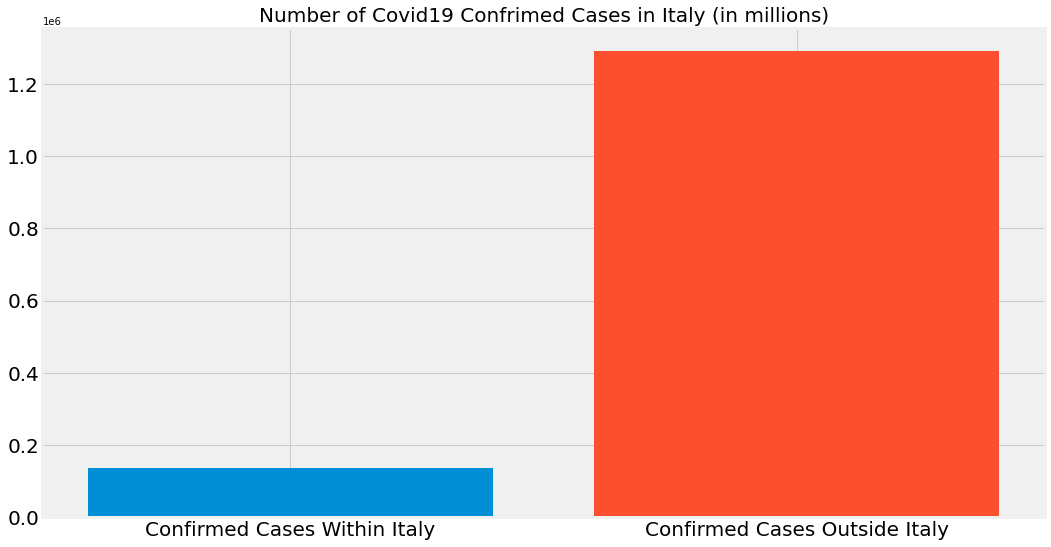

In [48]:
ItalyConfirmed = latestConfirmed[confirmed['Country/Region']=='Italy'].sum()
confirmedOutsideItaly = np.sum(countryConfirmedCases) - ItalyConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within Italy', ItalyConfirmed)
plt.bar('Confirmed Cases Outside Italy', confirmedOutsideItaly)
plt.title('Number of Covid19 Confrimed Cases in Italy (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [49]:
percentConfirmedOutsideItaly = (confirmedOutsideItaly/(confirmedOutsideItaly + ItalyConfirmed)) * 100
percentConfirmedItaly = (ItalyConfirmed/(confirmedOutsideItaly + ItalyConfirmed)) * 100
print('Confirmed Outside Italy: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideUK, percentConfirmedOutsideItaly))
print('Confirmed Within Italy: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(ItalyConfirmed, percentConfirmedItaly))
print('Total: {} confirmed cases'.format(ItalyConfirmed + confirmedOutsideItaly))

Confirmed Outside Italy: 1370147 confirmed (that is about 90.49% of total world confirmed cases)
Confirmed Within Italy: 135586 confirmed (that is about 9.51% of total world confirmed cases)
Total: 1426096 confirmed cases


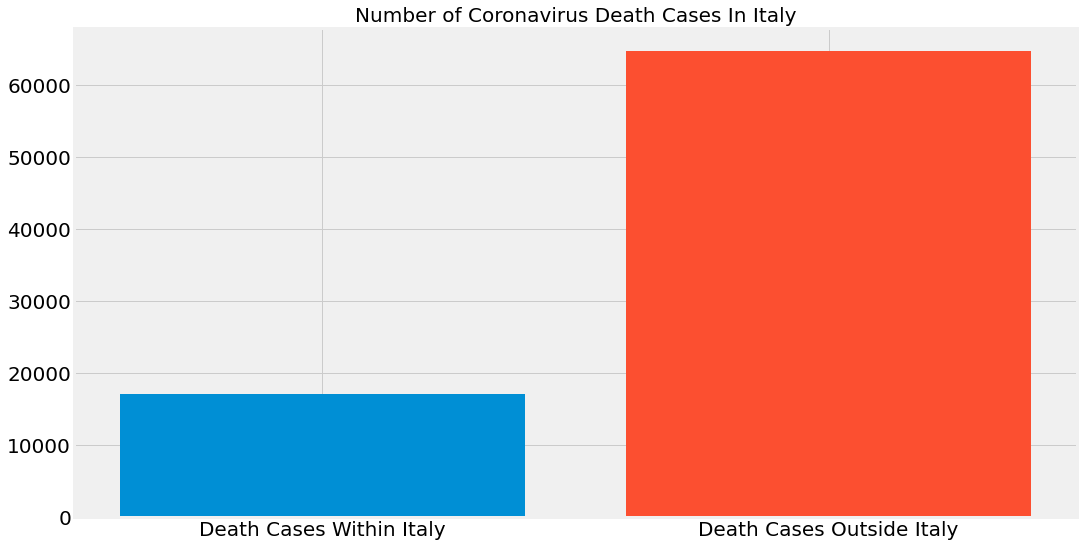

In [50]:
ItalyDeaths = latestDeaths[deaths['Country/Region']=='Italy'].sum()
deathsOutsideItaly = np.sum(countryDeathCases) - ItalyDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within Italy', ItalyDeaths)
plt.bar('Death Cases Outside Italy', deathsOutsideItaly)
plt.title('Number of Coronavirus Death Cases In Italy', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [51]:
percentDeathsOutsideItaly = (deathsOutsideItaly/(deathsOutsideItaly + ItalyDeaths)) * 100
percentDeathsItaly = (ItalyDeaths/(deathsOutsideItaly + ItalyDeaths)) * 100
ItalyDeathRate = (ItalyDeaths/ItalyConfirmed) * 100
print('Deaths Outside Italy: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideItaly, percentDeathsOutsideItaly))
print('Deaths Within Italy: {} deaths (that is about {:.2f}% of total world death cases)'.format(ItalyDeaths, percentDeathsItaly))
print('Total: {} deaths'.format(ItalyDeaths + deathsOutsideItaly))
print("Italy's Death rate is {:.2f}%".format(ItalyDeathRate))

Deaths Outside Italy: 64738 deaths (that is about 79.08% of total world death cases)
Deaths Within Italy: 17127 deaths (that is about 20.92% of total world death cases)
Total: 81865 deaths
Italy's Death rate is 12.63%


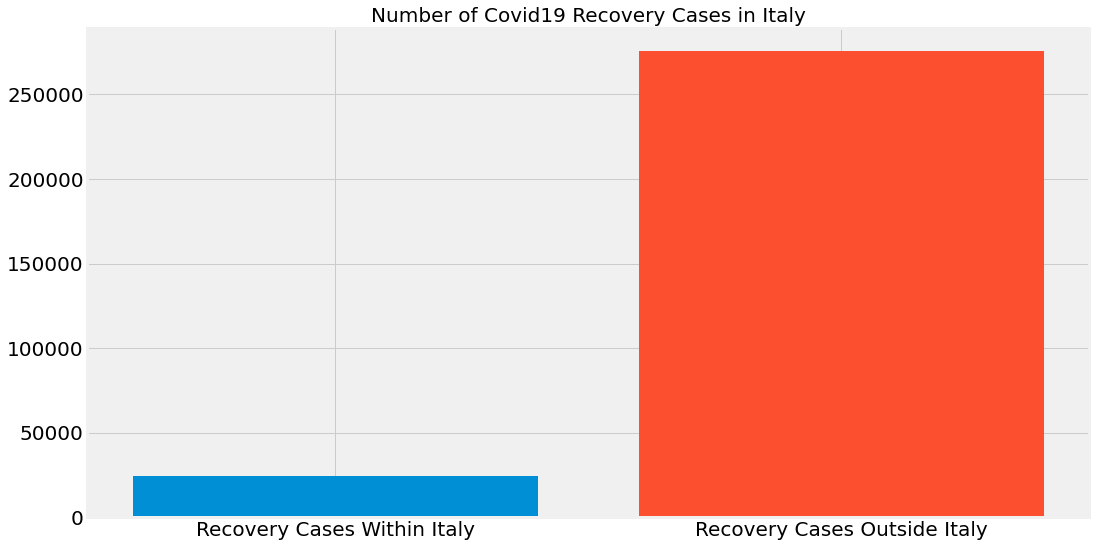

In [52]:
ItalyRecoveries = latestRecoveries[recoveries['Country/Region']=='Italy'].sum()
recoveriesOutsideItaly = np.sum(countryRecoveryCases) - ItalyRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within Italy', ItalyRecoveries)
plt.bar('Recovery Cases Outside Italy', recoveriesOutsideItaly)
plt.title('Number of Covid19 Recovery Cases in Italy', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [53]:
percentRecoveriesOutsideItaly = (recoveriesOutsideItaly/(recoveriesOutsideItaly + ItalyRecoveries)) * 100
percentRecoveriesItaly = (ItalyRecoveries/(recoveriesOutsideItaly + ItalyRecoveries)) * 100
ItalyRecoveryRate = (ItalyRecoveries/ItalyConfirmed) * 100
print('Recoveries Outside Italy: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideItaly, percentRecoveriesOutsideItaly))
print('Recoveries Within Italy: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(ItalyRecoveries, percentRecoveriesItaly))
print('Total: {} recoveries'.format(ItalyRecoveries + recoveriesOutsideItaly))
print("Italy's Death Rate is {:.2f}%".format(ItalyRecoveryRate))

Recoveries Outside Italy: 275411 recoveries (that is about 91.86% of total world recovery cases)
Recoveries Within Italy: 24392 recoveries (that is about 8.14% of total world recovery cases)
Total: 299803 recoveries
Italy's Death Rate is 17.99%


***Spain Statistics

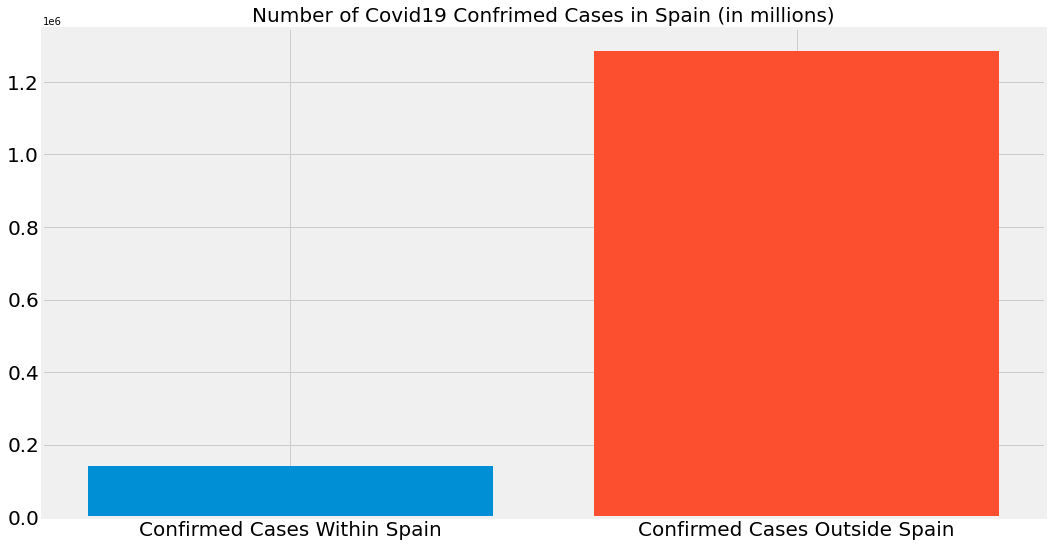

In [54]:
SpainConfirmed = latestConfirmed[confirmed['Country/Region']=='Spain'].sum()
confirmedOutsideSpain = np.sum(countryConfirmedCases) - SpainConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within Spain', SpainConfirmed)
plt.bar('Confirmed Cases Outside Spain', confirmedOutsideSpain)
plt.title('Number of Covid19 Confrimed Cases in Spain (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [55]:
percentConfirmedOutsideSpain = (confirmedOutsideSpain/(confirmedOutsideSpain + SpainConfirmed)) * 100
percentConfirmedSpain = (SpainConfirmed/(confirmedOutsideSpain + SpainConfirmed)) * 100
print('Confirmed Outside Spain: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideSpain, percentConfirmedOutsideSpain))
print('Confirmed Within Spain: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(SpainConfirmed, percentConfirmedSpain))
print('Total: {} confirmed cases'.format(SpainConfirmed + confirmedOutsideSpain))

Confirmed Outside Spain: 1284154 confirmed (that is about 90.05% of total world confirmed cases)
Confirmed Within Spain: 141942 confirmed (that is about 9.95% of total world confirmed cases)
Total: 1426096 confirmed cases


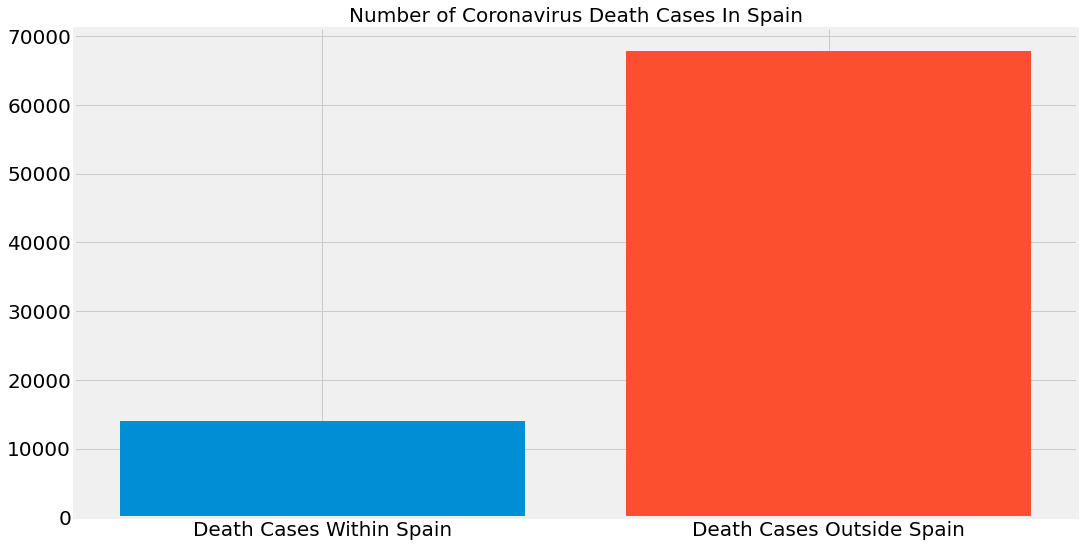

In [56]:
SpainDeaths = latestDeaths[deaths['Country/Region']=='Spain'].sum()
deathsOutsideSpain = np.sum(countryDeathCases) - SpainDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within Spain', SpainDeaths)
plt.bar('Death Cases Outside Spain', deathsOutsideSpain)
plt.title('Number of Coronavirus Death Cases In Spain', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [57]:
percentDeathsOutsideSpain = (deathsOutsideSpain/(deathsOutsideSpain + SpainDeaths)) * 100
percentDeathsSpain = (SpainDeaths/(deathsOutsideSpain + SpainDeaths)) * 100
SpainDeathRate = (SpainDeaths/SpainConfirmed) * 100
print('Deaths Outside Spain: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideSpain, percentDeathsOutsideSpain))
print('Deaths Within Spain: {} deaths (that is about {:.2f}% of total wworld death cases)'.format(SpainDeaths, percentDeathsSpain))
print('Total: {} deaths'.format(SpainDeaths + deathsOutsideSpain))
print("Spain's Death Rate is {:.2f}%".format(SpainDeathRate))

Deaths Outside Spain: 67820 deaths (that is about 82.84% of total world death cases)
Deaths Within Spain: 14045 deaths (that is about 17.16% of total wworld death cases)
Total: 81865 deaths
Spain's Death Rate is 9.89%


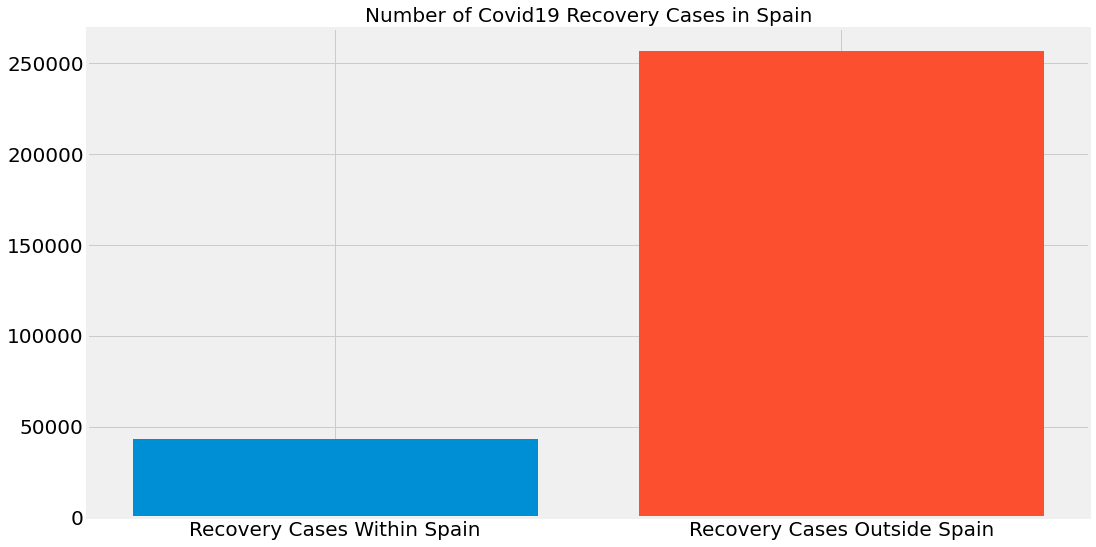

In [58]:
SpainRecoveries = latestRecoveries[recoveries['Country/Region']=='Spain'].sum()
recoveriesOutsideSpain = np.sum(countryRecoveryCases) - SpainRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within Spain', SpainRecoveries)
plt.bar('Recovery Cases Outside Spain', recoveriesOutsideSpain)
plt.title('Number of Covid19 Recovery Cases in Spain', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [59]:
percentRecoveriesOutsideSpain = (recoveriesOutsideSpain/(recoveriesOutsideSpain + SpainRecoveries)) * 100
percentRecoveriesSpain = (SpainRecoveries/(recoveriesOutsideSpain + SpainRecoveries)) * 100
SpainRecoveryRate = (SpainRecoveries/SpainConfirmed) * 100
print('Recoveries Outside Spain: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideSpain, percentRecoveriesOutsideSpain))
print('Recoveries Within Spain: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(SpainRecoveries, percentRecoveriesSpain))
print('Total: {} recoveries'.format(SpainRecoveries + recoveriesOutsideSpain))
print("Spain's Recovery Rate is {:.2f}%".format(SpainRecoveryRate))

Recoveries Outside Spain: 256595 recoveries (that is about 85.59% of total world recovery cases)
Recoveries Within Spain: 43208 recoveries (that is about 14.41% of total world recovery cases)
Total: 299803 recoveries
Spain's Recovery Rate is 30.44%


***Iran Statistics

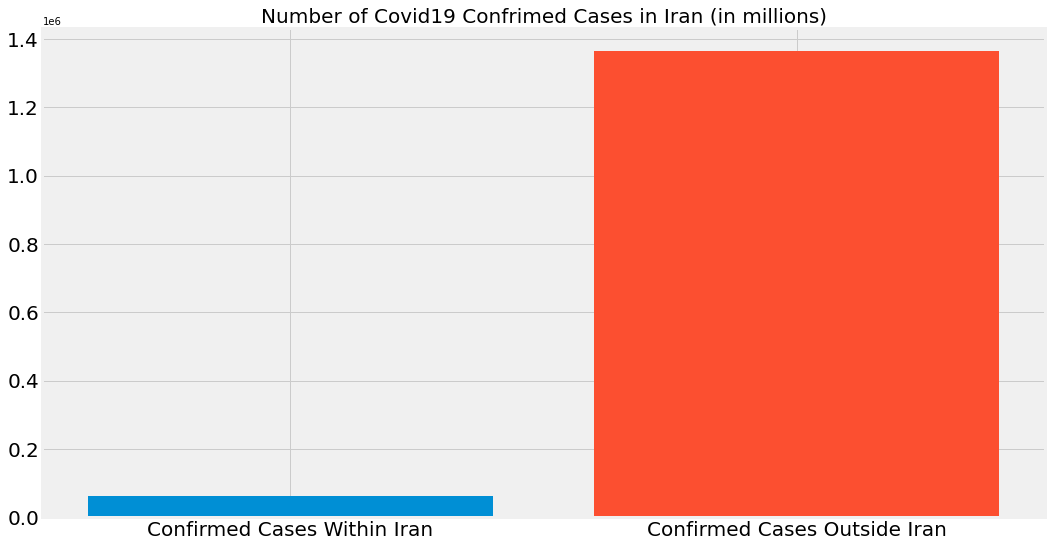

In [60]:
iranConfirmed = latestConfirmed[confirmed['Country/Region']=='Iran'].sum()
confirmedOutsideiran = np.sum(countryConfirmedCases) - iranConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within Iran', iranConfirmed)
plt.bar('Confirmed Cases Outside Iran', confirmedOutsideiran)
plt.title('Number of Covid19 Confrimed Cases in Iran (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [61]:
percentConfirmedOutsideiran = (confirmedOutsideiran/(confirmedOutsideiran + iranConfirmed)) * 100
percentConfirmediran = (iranConfirmed/(confirmedOutsideiran + iranConfirmed)) * 100
print('Confirmed Outside Iran: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideiran, percentConfirmedOutsideiran))
print('Confirmed Within Iran: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(iranConfirmed, percentConfirmediran))
print('Total: {} confirmed cases'.format(iranConfirmed + confirmedOutsideiran))

Confirmed Outside Iran: 1363507 confirmed (that is about 95.61% of total world confirmed cases)
Confirmed Within Iran: 62589 confirmed (that is about 4.39% of total world confirmed cases)
Total: 1426096 confirmed cases


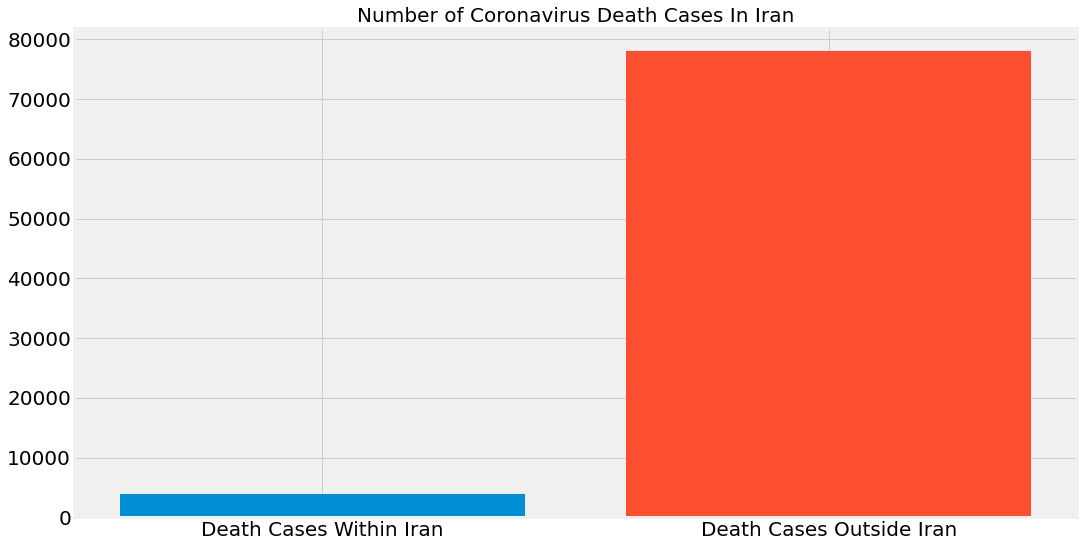

In [62]:
iranDeaths = latestDeaths[deaths['Country/Region']=='Iran'].sum()
deathsOutsideiran = np.sum(countryDeathCases) - iranDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within Iran', iranDeaths)
plt.bar('Death Cases Outside Iran', deathsOutsideiran)
plt.title('Number of Coronavirus Death Cases In Iran', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [63]:
percentDeathsOutsideiran = (deathsOutsideiran/(deathsOutsideiran + iranDeaths)) * 100
percentDeathsiran = (iranDeaths/(deathsOutsideiran + iranDeaths)) * 100
IranDeathRate = (iranDeaths/iranConfirmed) * 100
print('Deaths Outside Iran: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideiran, percentDeathsOutsideiran))
print('Deaths Within Iran: {} deaths (that is about {:.2f}% of total world death cases)'.format(iranDeaths, percentDeathsiran))
print('Total: {} deaths'.format(iranDeaths + deathsOutsideiran))
print("Iran's Death Rate is {:.2f}%".format(IranDeathRate))

Deaths Outside Iran: 77993 deaths (that is about 95.27% of total world death cases)
Deaths Within Iran: 3872 deaths (that is about 4.73% of total world death cases)
Total: 81865 deaths
Iran's Death Rate is 6.19%


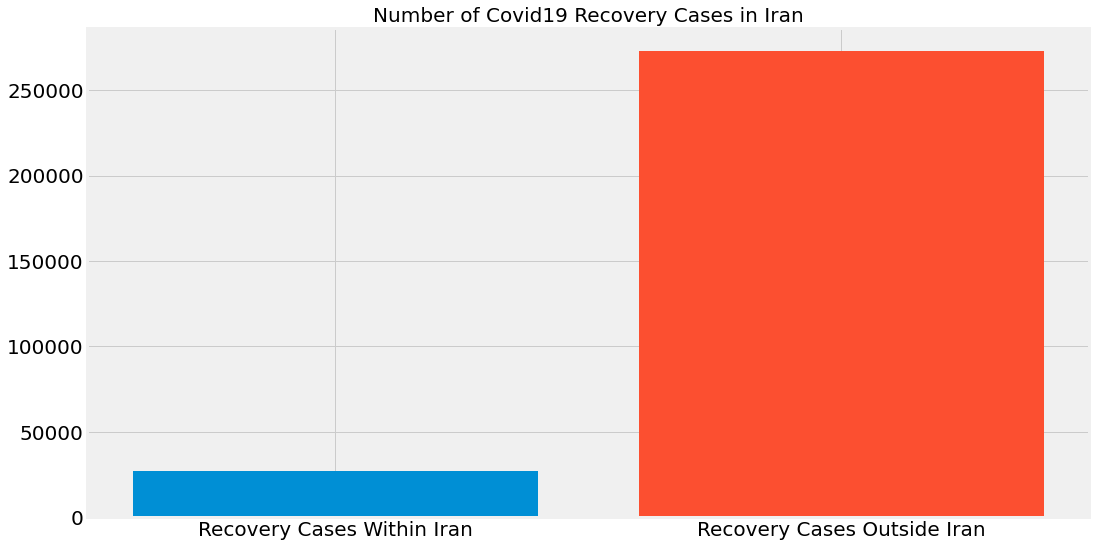

In [64]:
iranRecoveries = latestRecoveries[recoveries['Country/Region']=='Iran'].sum()
recoveriesOutsideiran = np.sum(countryRecoveryCases) - iranRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within Iran', iranRecoveries)
plt.bar('Recovery Cases Outside Iran', recoveriesOutsideiran)
plt.title('Number of Covid19 Recovery Cases in Iran', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [65]:
percentRecoveriesOutsideiran = (recoveriesOutsideiran/(recoveriesOutsideiran + iranRecoveries)) * 100
percentRecoveriesiran = (iranRecoveries/(recoveriesOutsideiran + iranRecoveries)) * 100
IranRecoveryRate = (iranRecoveries/iranConfirmed) * 100
print('Recoveries Outside Iran: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideiran, percentRecoveriesOutsideiran))
print('Recoveries Within Iran: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(iranRecoveries, percentRecoveriesiran))
print('Total: {} recoveries'.format(iranRecoveries + recoveriesOutsideiran))
print("Iran's Recovery Rate is {:.2f}%".format(IranRecoveryRate))

Recoveries Outside Iran: 272764 recoveries (that is about 90.98% of total world recovery cases)
Recoveries Within Iran: 27039 recoveries (that is about 9.02% of total world recovery cases)
Total: 299803 recoveries
Iran's Recovery Rate is 43.20%


***Germany Statistics

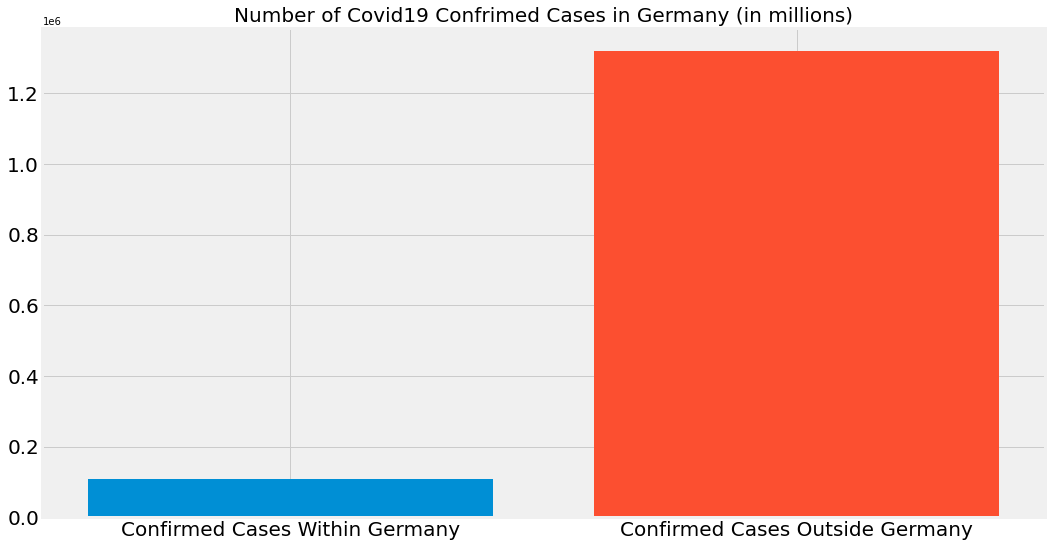

In [66]:
GermanyConfirmed = latestConfirmed[confirmed['Country/Region']=='Germany'].sum()
confirmedOutsideGermany = np.sum(countryConfirmedCases) - GermanyConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within Germany', GermanyConfirmed)
plt.bar('Confirmed Cases Outside Germany', confirmedOutsideGermany)
plt.title('Number of Covid19 Confrimed Cases in Germany (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [67]:
percentConfirmedOutsideGermany = (confirmedOutsideGermany/(confirmedOutsideGermany + GermanyConfirmed)) * 100
percentConfirmedGermany = (GermanyConfirmed/(confirmedOutsideGermany + GermanyConfirmed)) * 100
print('Confirmed Outside Germany: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideGermany, percentConfirmedOutsideGermany))
print('Confirmed Within Germany: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(GermanyConfirmed, percentConfirmedGermany))
print('Total: {} confirmed cases'.format(GermanyConfirmed + confirmedOutsideGermany))

Confirmed Outside Germany: 1318433 confirmed (that is about 92.45% of total world confirmed cases)
Confirmed Within Germany: 107663 confirmed (that is about 7.55% of total world confirmed cases)
Total: 1426096 confirmed cases


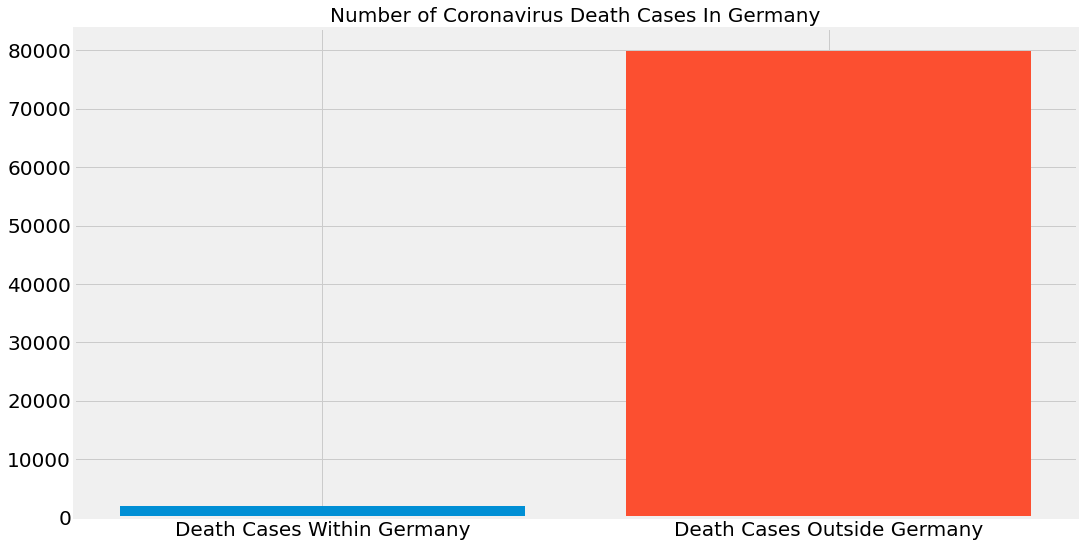

In [68]:
GermanyDeaths = latestDeaths[deaths['Country/Region']=='Germany'].sum()
deathsOutsideGermany = np.sum(countryDeathCases) - GermanyDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within Germany', GermanyDeaths)
plt.bar('Death Cases Outside Germany', deathsOutsideGermany)
plt.title('Number of Coronavirus Death Cases In Germany', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [69]:
percentDeathsOutsideGermany = (deathsOutsideGermany/(deathsOutsideGermany + GermanyDeaths)) * 100
percentDeathsGermany = (GermanyDeaths/(deathsOutsideGermany + GermanyDeaths)) * 100
GermanyDeathRate = (GermanyDeaths/GermanyConfirmed) * 100
print('Deaths Outside Germany: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideGermany, percentDeathsOutsideGermany))
print('Deaths Within Germany: {} deaths (that is about {:.2f}% of total world death cases)'.format(GermanyDeaths, percentDeathsGermany))
print('Total: {} deaths'.format(GermanyDeaths + deathsOutsideGermany))
print("Germany's Death Rate is {:.2f}%".format(GermanyDeathRate))

Deaths Outside Germany: 79849 deaths (that is about 97.54% of total world death cases)
Deaths Within Germany: 2016 deaths (that is about 2.46% of total world death cases)
Total: 81865 deaths
Germany's Death Rate is 1.87%


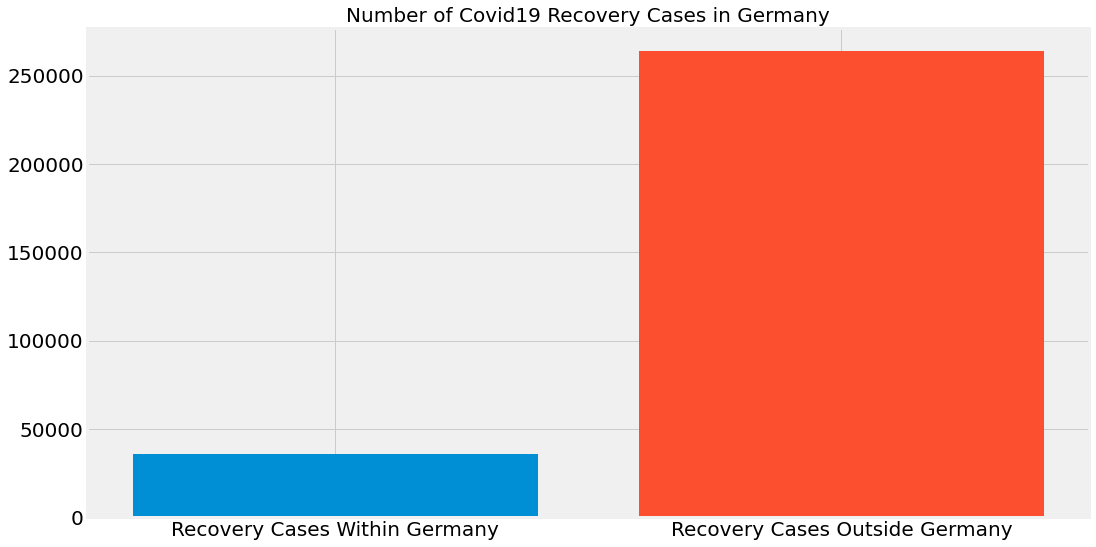

In [70]:
GermanyRecoveries = latestRecoveries[recoveries['Country/Region']=='Germany'].sum()
recoveriesOutsideGermany = np.sum(countryRecoveryCases) - GermanyRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within Germany', GermanyRecoveries)
plt.bar('Recovery Cases Outside Germany', recoveriesOutsideGermany)
plt.title('Number of Covid19 Recovery Cases in Germany', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [71]:
percentRecoveriesOutsideGermany = (recoveriesOutsideGermany/(recoveriesOutsideGermany + GermanyRecoveries)) * 100
percentRecoveriesGermany = (GermanyRecoveries/(recoveriesOutsideGermany + GermanyRecoveries)) * 100
GermanyRecoveryRate = (GermanyRecoveries/GermanyConfirmed) * 100
print('Recoveries Outside Germany: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideGermany, percentRecoveriesOutsideGermany))
print('Recoveries Within Germany: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(GermanyRecoveries, percentRecoveriesGermany))
print('Total: {} recoveries'.format(GermanyRecoveries + recoveriesOutsideGermany))
print("Germany's Recovery Rate is {:.2f}%".format(GermanyRecoveryRate))

Recoveries Outside Germany: 263722 recoveries (that is about 87.97% of total world recovery cases)
Recoveries Within Germany: 36081 recoveries (that is about 12.03% of total world recovery cases)
Total: 299803 recoveries
Germany's Recovery Rate is 33.51%


***France Statistics

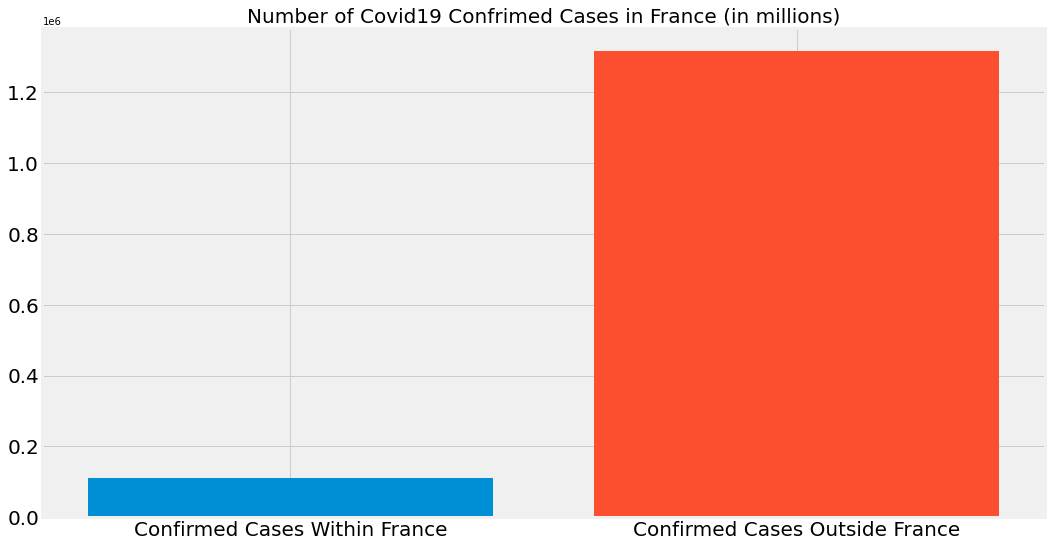

In [72]:
FranceConfirmed = latestConfirmed[confirmed['Country/Region']=='France'].sum()
confirmedOutsideFrance = np.sum(countryConfirmedCases) - FranceConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within France', FranceConfirmed)
plt.bar('Confirmed Cases Outside France', confirmedOutsideFrance)
plt.title('Number of Covid19 Confrimed Cases in France (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [73]:
percentConfirmedOutsideFrance = (confirmedOutsideFrance/(confirmedOutsideFrance + FranceConfirmed)) * 100
percentConfirmedFrance = (FranceConfirmed/(confirmedOutsideFrance + FranceConfirmed)) * 100
print('Confirmed Outside France: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideFrance, percentConfirmedOutsideFrance))
print('Confirmed Within France: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(FranceConfirmed, percentConfirmedFrance))
print('Total: {} confirmed cases'.format(FranceConfirmed + confirmedOutsideFrance))

Confirmed Outside France: 1316031 confirmed (that is about 92.28% of total world confirmed cases)
Confirmed Within France: 110065 confirmed (that is about 7.72% of total world confirmed cases)
Total: 1426096 confirmed cases


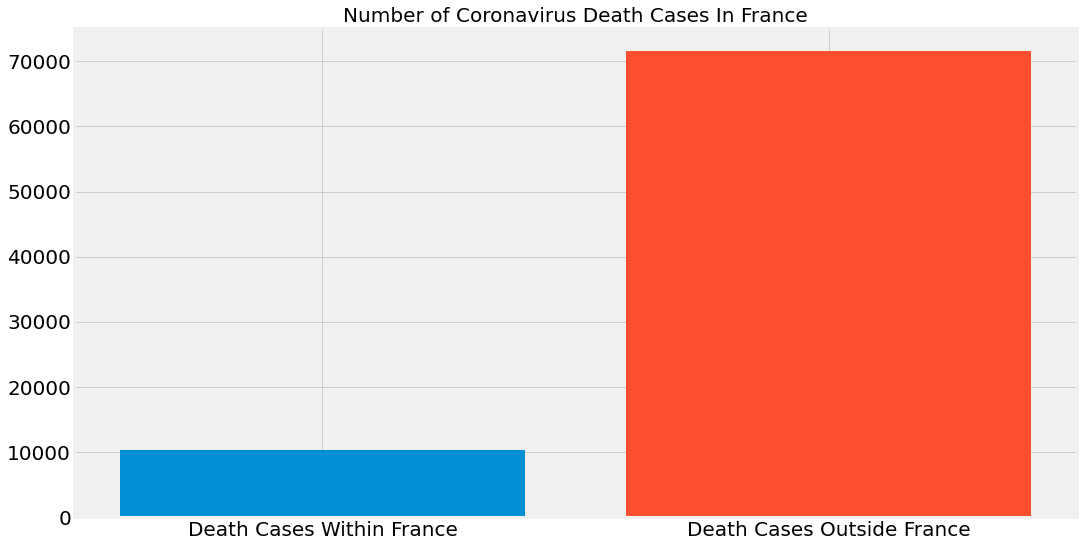

In [74]:
FranceDeaths = latestDeaths[deaths['Country/Region']=='France'].sum()
deathsOutsideFrance = np.sum(countryDeathCases) - FranceDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within France', FranceDeaths)
plt.bar('Death Cases Outside France', deathsOutsideFrance)
plt.title('Number of Coronavirus Death Cases In France', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [75]:
percentDeathsOutsideFrance = (deathsOutsideFrance/(deathsOutsideFrance + FranceDeaths)) * 100
percentDeathsFrance = (FranceDeaths/(deathsOutsideFrance + FranceDeaths)) * 100
FranceDeathRate = (FranceDeaths/FranceConfirmed) * 100
print('Deaths Outside France: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideFrance, percentDeathsOutsideFrance))
print('Deaths Within France: {} deaths (that is about {:.2f}% of total world death cases)'.format(FranceDeaths, percentDeathsFrance))
print('Total: {} deaths'.format(FranceDeaths + deathsOutsideFrance))
print("Death Rate in France is {:.2f}%".format(FranceDeathRate))

Deaths Outside France: 71522 deaths (that is about 87.37% of total world death cases)
Deaths Within France: 10343 deaths (that is about 12.63% of total world death cases)
Total: 81865 deaths
Death Rate in France is 9.40%


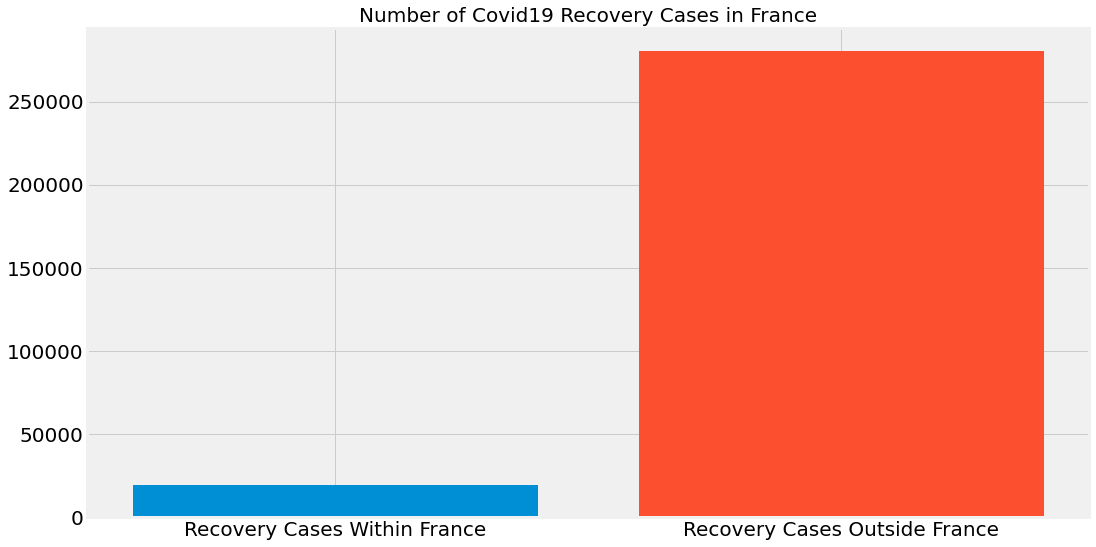

In [76]:
FranceRecoveries = latestRecoveries[recoveries['Country/Region']=='France'].sum()
recoveriesOutsideFrance = np.sum(countryRecoveryCases) - FranceRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within France', FranceRecoveries)
plt.bar('Recovery Cases Outside France', recoveriesOutsideFrance)
plt.title('Number of Covid19 Recovery Cases in France', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [77]:
percentRecoveriesOutsideFrance = (recoveriesOutsideFrance/(recoveriesOutsideFrance + FranceRecoveries)) * 100
percentRecoveriesFrance = (FranceRecoveries/(recoveriesOutsideFrance + FranceRecoveries)) * 100
FranceRecoveryRate = (FranceRecoveries/FranceConfirmed) * 100
print('Recoveries Outside France: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideFrance, percentRecoveriesOutsideFrance))
print('Recoveries Within France: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(FranceRecoveries, percentRecoveriesFrance))
print('Total: {} recoveries'.format(FranceRecoveries + recoveriesOutsideFrance))
print("Recovery Rate in France is {:.2f}%".format(FranceRecoveryRate))

Recoveries Outside France: 280280 recoveries (that is about 93.49% of total world recovery cases)
Recoveries Within France: 19523 recoveries (that is about 6.51% of total world recovery cases)
Total: 299803 recoveries
Recovery Rate in France is 17.74%


***Belgium Statistics

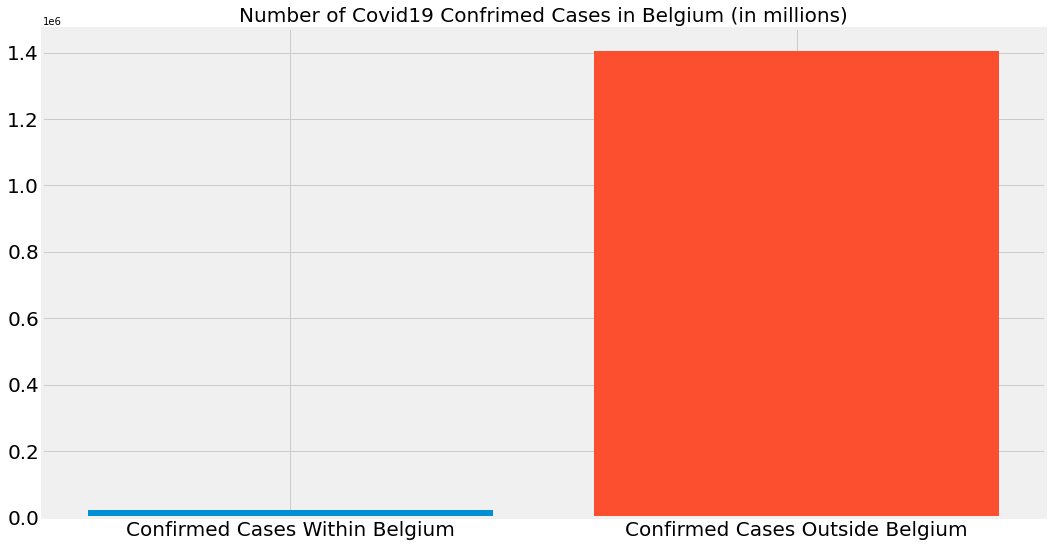

In [78]:
BelgiumConfirmed = latestConfirmed[confirmed['Country/Region']=='Belgium'].sum()
confirmedOutsideBelgium = np.sum(countryConfirmedCases) - BelgiumConfirmed
plt.figure(figsize=(16, 9))
plt.bar('Confirmed Cases Within Belgium', BelgiumConfirmed)
plt.bar('Confirmed Cases Outside Belgium', confirmedOutsideBelgium)
plt.title('Number of Covid19 Confrimed Cases in Belgium (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [79]:
percentConfirmedOutsideBelgium = (confirmedOutsideBelgium/(confirmedOutsideBelgium + BelgiumConfirmed)) * 100
percentConfirmedBelgium = (BelgiumConfirmed/(confirmedOutsideBelgium + BelgiumConfirmed)) * 100
print('Confirmed Outside Belgium: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(confirmedOutsideBelgium, percentConfirmedOutsideBelgium))
print('Confirmed Within Belgium: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(BelgiumConfirmed, percentConfirmedBelgium))
print('Total: {} confirmed cases'.format(BelgiumConfirmed + confirmedOutsideBelgium))

Confirmed Outside Belgium: 1403902 confirmed (that is about 98.44% of total world confirmed cases)
Confirmed Within Belgium: 22194 confirmed (that is about 1.56% of total world confirmed cases)
Total: 1426096 confirmed cases


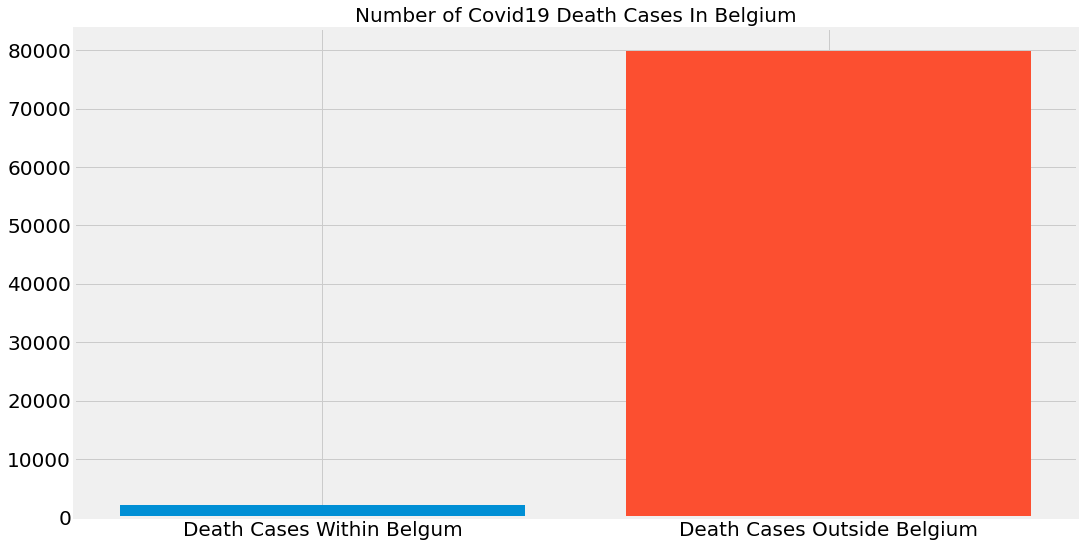

In [80]:
BelgiumDeaths = latestDeaths[deaths['Country/Region']=='Belgium'].sum()
deathsOutsideBelgium = np.sum(countryDeathCases) - BelgiumDeaths
plt.figure(figsize=(16, 9))
plt.bar('Death Cases Within Belgum', BelgiumDeaths)
plt.bar('Death Cases Outside Belgium', deathsOutsideBelgium)
plt.title('Number of Covid19 Death Cases In Belgium', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [81]:
percentDeathsOutsideBelgium = (deathsOutsideBelgium/(deathsOutsideBelgium + BelgiumDeaths)) * 100
percentDeathsBelgium = (BelgiumDeaths/(deathsOutsideBelgium + BelgiumDeaths)) * 100
BelgiumDeathRate = (BelgiumDeaths/BelgiumConfirmed) * 100
print('Deaths Outside Belgium: {} deaths (that is about {:.2f}% of total world death cases)'.format(deathsOutsideBelgium, percentDeathsOutsideBelgium))
print('Deaths Within Belgium: {} deaths (that is about {:.2f}% of total world death cases)'.format(BelgiumDeaths, percentDeathsBelgium))
print('Total: {} deaths'.format(BelgiumDeaths + deathsOutsideBelgium))
print("Death Rate in Belgium is {:.2f}%".format(BelgiumDeathRate))

Deaths Outside Belgium: 79830 deaths (that is about 97.51% of total world death cases)
Deaths Within Belgium: 2035 deaths (that is about 2.49% of total world death cases)
Total: 81865 deaths
Death Rate in Belgium is 9.17%


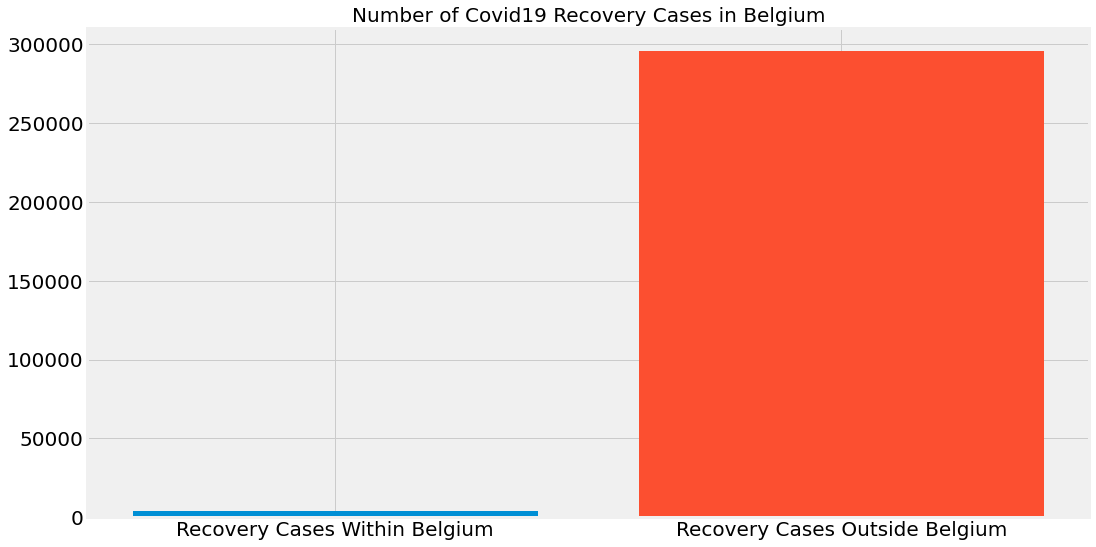

In [82]:
BelgiumRecoveries = latestRecoveries[recoveries['Country/Region']=='Belgium'].sum()
recoveriesOutsideBelgium = np.sum(countryRecoveryCases) - BelgiumRecoveries
plt.figure(figsize=(16, 9))
plt.bar('Recovery Cases Within Belgium', BelgiumRecoveries)
plt.bar('Recovery Cases Outside Belgium', recoveriesOutsideBelgium)
plt.title('Number of Covid19 Recovery Cases in Belgium', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [83]:
percentRecoveriesOutsideBelgium = (recoveriesOutsideBelgium/(recoveriesOutsideBelgium + BelgiumRecoveries)) * 100
percentRecoveriesBelgium = (BelgiumRecoveries/(recoveriesOutsideBelgium + BelgiumRecoveries)) * 100
BelgiumRecoveryRate = (BelgiumRecoveries/BelgiumConfirmed) * 100
print('Recoveries Outside Belgium: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(recoveriesOutsideBelgium, percentRecoveriesOutsideBelgium))
print('Recoveries Within Belgium: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(BelgiumRecoveries, percentRecoveriesBelgium))
print('Total: {} recoveries'.format(BelgiumRecoveries + recoveriesOutsideBelgium))
print("Recovery Rate in Belgium is {:.2f}%".format(BelgiumRecoveryRate))

Recoveries Outside Belgium: 295646 recoveries (that is about 98.61% of total world recovery cases)
Recoveries Within Belgium: 4157 recoveries (that is about 1.39% of total world recovery cases)
Total: 299803 recoveries
Recovery Rate in Belgium is 18.73%


*Summary On Case Studies

***Confirmed Cases

In [84]:
print('Confirmed Within China: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(chinaConfirmed, percentChina))
print('Confirmed Within United States: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(usConfirmed, percentConfirmedUS))
print('Confirmed Within United Kingdom: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(ukConfirmed, percentConfirmedUK))
print('Confirmed Within Italy: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(ItalyConfirmed, percentConfirmedItaly))
print('Confirmed Within Spain: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(SpainConfirmed, percentConfirmedSpain))
print('Confirmed Within Germany: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(GermanyConfirmed, percentConfirmedGermany))
print('Confirmed Within France: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(FranceConfirmed, percentConfirmedFrance))
print('Confirmed Within Iran: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(iranConfirmed, percentConfirmediran))
print('Confirmed Within Belgium: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(BelgiumConfirmed, percentConfirmedBelgium))

Confirmed Within China: 82718 confirmed (that is about 5.80% of total world confirmed cases)
Confirmed Within United States: 396223 confirmed (that is about 27.78% of total world confirmed cases)
Confirmed Within United Kingdom: 55949 confirmed (that is about 3.92% of total world confirmed cases)
Confirmed Within Italy: 135586 confirmed (that is about 9.51% of total world confirmed cases)
Confirmed Within Spain: 141942 confirmed (that is about 9.95% of total world confirmed cases)
Confirmed Within Germany: 107663 confirmed (that is about 7.55% of total world confirmed cases)
Confirmed Within France: 110065 confirmed (that is about 7.72% of total world confirmed cases)
Confirmed Within Iran: 62589 confirmed (that is about 4.39% of total world confirmed cases)
Confirmed Within Belgium: 22194 confirmed (that is about 1.56% of total world confirmed cases)


***On Death Cases

In [85]:
print('Deaths Within China: {} deaths (that is about {:.2f}% of total world death cases)'.format(chinaDeaths, percentDeathsChina))
print('Deaths Within United States: {} deaths (that is about {:.2f}% of total world death cases)'.format(usDeaths, percentDeathsUS))
print('Deaths Within United Kingdom: {} deaths (that is about {:.2f}% of total world death cases)'.format(ukDeaths, percentDeathsUK))
print('Deaths Within Italy: {} deaths (that is about {:.2f}% of total world death cases)'.format(ItalyDeaths, percentDeathsItaly))
print('Deaths Within Spain: {} deaths (that is about {:.2f}% of total world death cases)'.format(SpainDeaths, percentDeathsSpain))
print('Deaths Within Iran: {} deaths (that is about {:.2f}% of total world death cases)'.format(iranDeaths, percentDeathsiran))
print('Deaths Within Germany: {} deaths (that is about {:.2f}% of total world death cases)'.format(GermanyDeaths, percentDeathsGermany))
print('Deaths Within France: {} deaths (that is about {:.2f}% of total world death cases)'.format(FranceDeaths, percentDeathsFrance))
print('Deaths Within Belgium: {} deaths (that is about {:.2f}% of total world death cases)'.format(BelgiumDeaths, percentDeathsBelgium))

Deaths Within China: 3335 deaths (that is about 4.07% of total world death cases)
Deaths Within United States: 12722 deaths (that is about 15.54% of total world death cases)
Deaths Within United Kingdom: 6171 deaths (that is about 7.54% of total world death cases)
Deaths Within Italy: 17127 deaths (that is about 20.92% of total world death cases)
Deaths Within Spain: 14045 deaths (that is about 17.16% of total world death cases)
Deaths Within Iran: 3872 deaths (that is about 4.73% of total world death cases)
Deaths Within Germany: 2016 deaths (that is about 2.46% of total world death cases)
Deaths Within France: 10343 deaths (that is about 12.63% of total world death cases)
Deaths Within Belgium: 2035 deaths (that is about 2.49% of total world death cases)


***On Death/Mortality Rates

In [86]:
print('The Death Rate within China is {:.2f}%'.format(ChinaDeathRate))
print("Death Rate in United States is {:.2f}%".format(USDeathRate))
print("Death Rate in United Kingdom is {:.2f}%".format(UKDeathRate))
print("Death Rate in Italy is {:.2f}%".format(ItalyDeathRate))
print("Death Rate in Spain is {:.2f}%".format(SpainDeathRate))
print("Death Rate in Iran is {:.2f}%".format(IranDeathRate))
print("Death Rate in Germany is {:.2f}%".format(GermanyDeathRate))
print("Death Rate in France is {:.2f}%".format(FranceDeathRate))
print("Death Rate in Belgium is {:.2f}%".format(BelgiumDeathRate))

The Death Rate within China is 4.03%
Death Rate in United States is 3.21%
Death Rate in United Kingdom is 11.03%
Death Rate in Italy is 12.63%
Death Rate in Spain is 9.89%
Death Rate in Iran is 6.19%
Death Rate in Germany is 1.87%
Death Rate in France is 9.40%
Death Rate in Belgium is 9.17%


***On Recovery Cases

In [87]:
print('Recoveries Within China: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(chinaRecoveries, percentRecoveriesChina))
print('Recoveries Within United States: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(usRecoveries, percentRecoveriesUS))
print('Recoveries Within United Kingdom: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(ukRecoveries, percentRecoveriesUK))
print('Recoveries Within Italy: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(ItalyRecoveries, percentRecoveriesItaly))
print('Recoveries Within Spain: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(SpainRecoveries, percentRecoveriesSpain))
print('Recoveries Within Iran: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(iranRecoveries, percentRecoveriesiran))
print('Recoveries Within Germany: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(GermanyRecoveries, percentRecoveriesGermany))
print('Recoveries Within France: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(FranceRecoveries, percentRecoveriesFrance))
print('Recoveries Within Belgium: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(BelgiumRecoveries, percentRecoveriesBelgium))

Recoveries Within China: 77410 recoveries (that is about 25.82% of total world recovery cases)
Recoveries Within United States: 21763 recoveries (that is about 7.26% of total world recovery cases)
Recoveries Within United Kingdom: 325 recoveries (that is about 0.11% of total world recovery cases)
Recoveries Within Italy: 24392 recoveries (that is about 8.14% of total world recovery cases)
Recoveries Within Spain: 43208 recoveries (that is about 14.41% of total world recovery cases)
Recoveries Within Iran: 27039 recoveries (that is about 9.02% of total world recovery cases)
Recoveries Within Germany: 36081 recoveries (that is about 12.03% of total world recovery cases)
Recoveries Within France: 19523 recoveries (that is about 6.51% of total world recovery cases)
Recoveries Within Belgium: 4157 recoveries (that is about 1.39% of total world recovery cases)


***On Recovery Rates

In [88]:
print("Recovery rate in China is {:.2f}%".format(ChinaRecoveryRate))
print("Recovery Rate in the United States is {:.2f}%".format(USRecoveryRate))
print("Recovery Rate in the United Kingdom is {:.2f}%".format(UKRecoveryRate))
print("Recovery Rate in Italy is {:.2f}%".format(ItalyRecoveryRate))
print("Recovery Rate in Spain is {:.2f}%".format(SpainRecoveryRate))
print("Recovery Rate in Iran is {:.2f}%".format(IranRecoveryRate))
print("Recovery Rate in Germany is {:.2f}%".format(GermanyRecoveryRate))
print("Recovery Rate in France is {:.2f}%".format(FranceRecoveryRate))
print("Recovery Rate in Belgium is {:.2f}%".format(BelgiumRecoveryRate))

Recovery rate in China is 93.58%
Recovery Rate in the United States is 5.49%
Recovery Rate in the United Kingdom is 0.58%
Recovery Rate in Italy is 17.99%
Recovery Rate in Spain is 30.44%
Recovery Rate in Iran is 43.20%
Recovery Rate in Germany is 33.51%
Recovery Rate in France is 17.74%
Recovery Rate in Belgium is 18.73%


***On Active Cases

In [89]:
print("There are {:.2f} active cases in China".format(chinaConfirmed-chinaDeaths-chinaRecoveries))
print("There are {:.2f} active cases in The US".format(usConfirmed-usDeaths-usRecoveries))
print("There are {:.2f} active cases in The United Kingdom".format(ukConfirmed-ukDeaths-ukRecoveries))
print("There are {:.2f} active cases in The Italy".format(ItalyConfirmed-ItalyDeaths-ItalyRecoveries))
print("There are {:.2f} active cases in The Spain".format(SpainConfirmed-SpainDeaths-SpainRecoveries))
print("There are {:.2f} active cases in The Iran".format(iranConfirmed-iranDeaths-iranRecoveries))
print("There are {:.2f} active cases in The Germany".format(GermanyConfirmed-GermanyDeaths-GermanyRecoveries))
print("There are {:.2f} active cases in The France".format(FranceConfirmed-FranceDeaths-FranceRecoveries))
print("There are {:.2f} active cases in The Belgium".format(BelgiumConfirmed-BelgiumDeaths-BelgiumRecoveries))

There are 1973.00 active cases in China
There are 361738.00 active cases in The US
There are 49453.00 active cases in The United Kingdom
There are 94067.00 active cases in The Italy
There are 84689.00 active cases in The Spain
There are 31678.00 active cases in The Iran
There are 69566.00 active cases in The Germany
There are 80199.00 active cases in The France
There are 16002.00 active cases in The Belgium


To forecast the future

In [90]:
futureDays = 200
forecastFuture = np.array([i for i in range(len(dates)+futureDays)]).reshape(-1, 1)
adjustedForcast = forecastFuture[:-10]

Convert integer into datetime for better visualization

In [91]:
start = '1/22/2020'
startDate = datetime.datetime.strptime(start, '%m/%d/%Y')
forecastFutureDates = []
for i in range(len(forecastFuture)):
    forecastFutureDates.append((startDate + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

Selecting the training and testing parameters with a test size of 25% of the original data and setting shuffle parameter to false, because the model needs to learn from the trend of the data.

In [92]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(fromDayZero, worldCases, test_size=0.25, shuffle=False) 

Model for predicting the number of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. 

In [93]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
polyForecastFuture = poly.fit_transform(forecastFuture)

In [94]:
# polynomial regression
lm = LinearRegression(normalize=True, fit_intercept=True)
lm.fit(poly_X_train_confirmed, y_train_confirmed)
testLinearPred = lm.predict(poly_X_test_confirmed)
linearPred = lm.predict(polyForecastFuture)
print('MAE:', mean_absolute_error(testLinearPred, y_test_confirmed))
print('MSE:', mean_squared_error(testLinearPred, y_test_confirmed))

MAE: 73434.33568159946
MSE: 7058748497.815387


In [95]:
print(lm.coef_)

[[ 0.00000000e+00 -1.98503857e+03  3.97584922e+02 -9.67067282e+00
   7.73925533e-03  1.26982247e-03]]


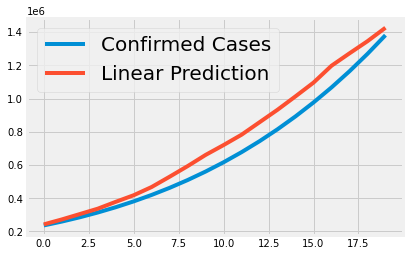

In [96]:
plt.plot(testLinearPred)
plt.plot(y_test_confirmed)
plt.legend(['Confirmed Cases', 'Linear Prediction'], prop={'size': 20})

In [97]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesianGrid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesianSearch = RandomizedSearchCV(bayesian, bayesianGrid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesianSearch.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.0s finished
C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [98]:
bayesianSearch.best_params_

{'tol': 0.01,
 'lambda_2': 0.0001,
 'lambda_1': 1e-05,
 'alpha_2': 1e-05,
 'alpha_1': 1e-05}

In [99]:
bayesianConfirmed = bayesianSearch.best_estimator_
testBayesianPred = bayesianConfirmed.predict(poly_X_test_confirmed)
bayesianPred = bayesianConfirmed.predict(polyForecastFuture)
print('MAE:', mean_absolute_error(testBayesianPred, y_test_confirmed))
print('MSE:',mean_squared_error(testBayesianPred, y_test_confirmed))

MAE: 37644.10776863615
MSE: 2927320598.384362


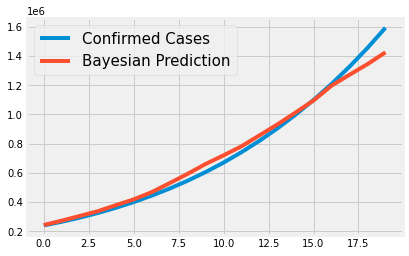

In [100]:
plt.plot(testBayesianPred)
plt.plot(y_test_confirmed)
plt.legend(['Confirmed Cases', 'Bayesian Prediction'], prop={'size': 15})

 Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

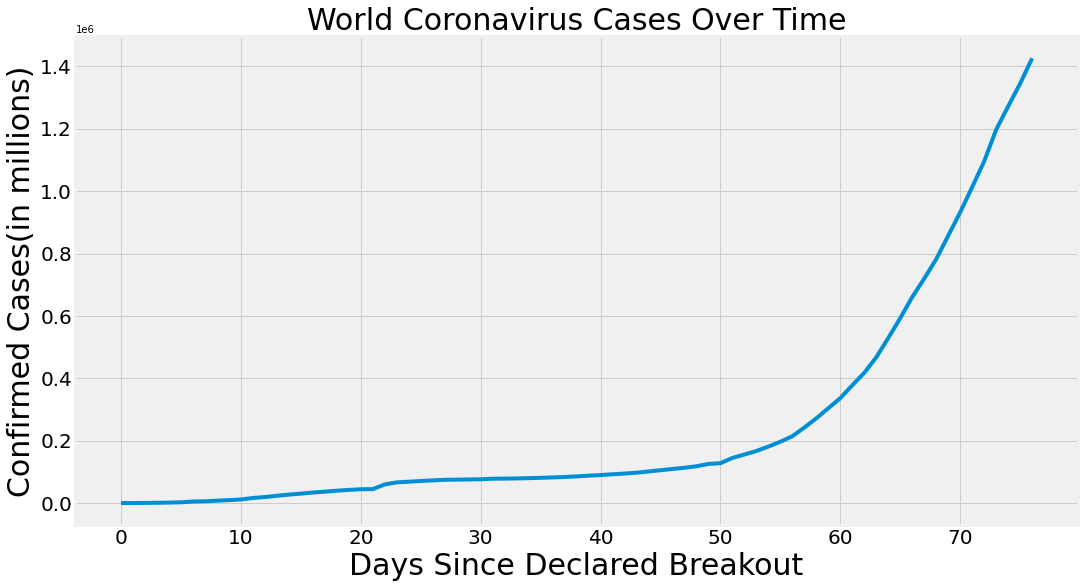

In [101]:
adjustedDates = fromDayZero.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, worldCases)
plt.title('World Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases(in millions)', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

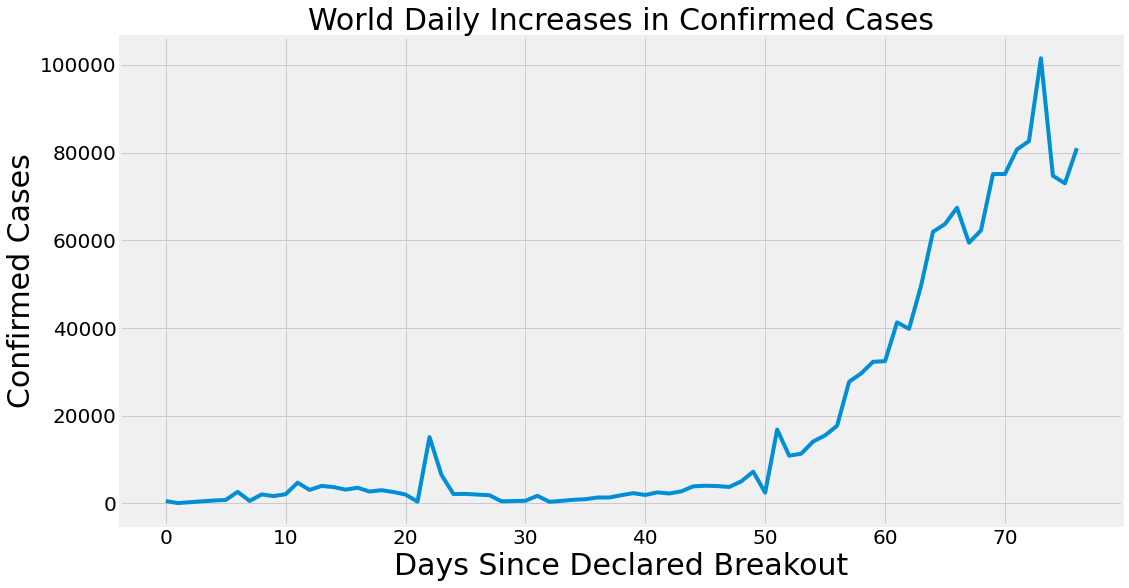

In [102]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, worldDailyIncrease)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

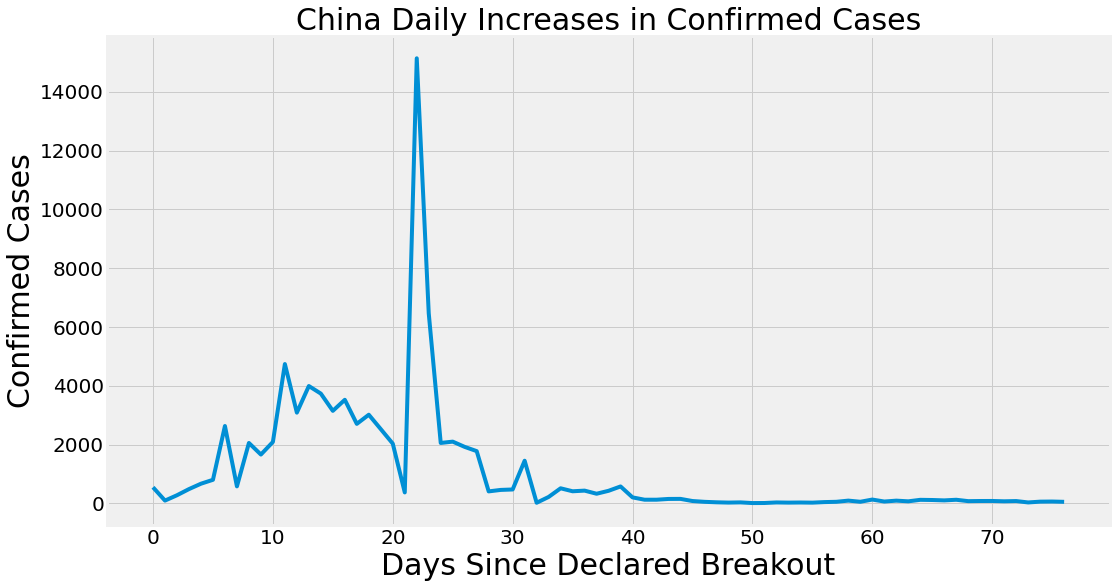

In [103]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, chinaDailyIncrease)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

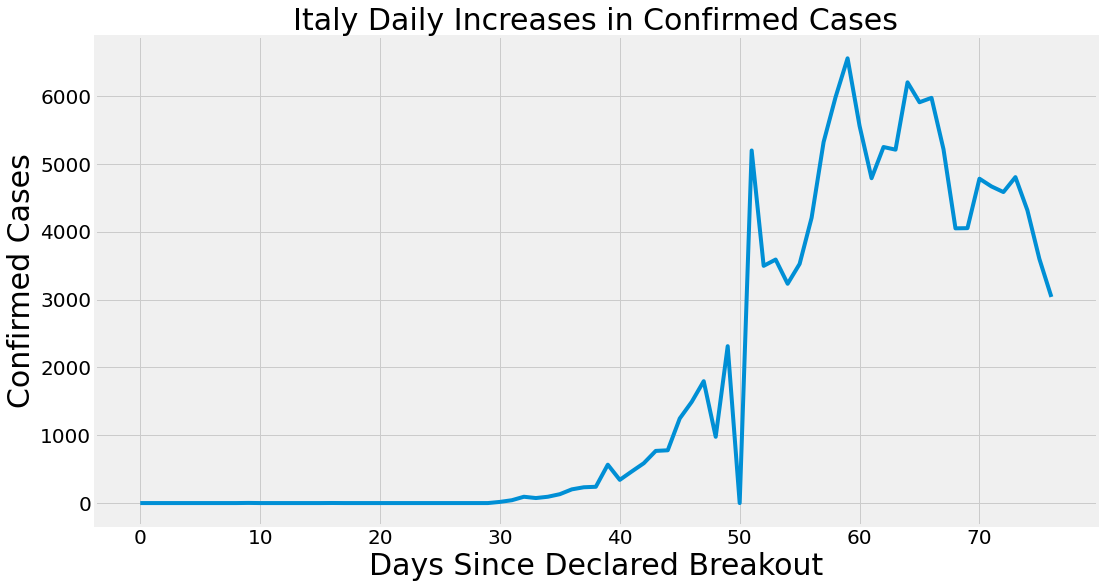

In [104]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, italyDailyIncrease)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

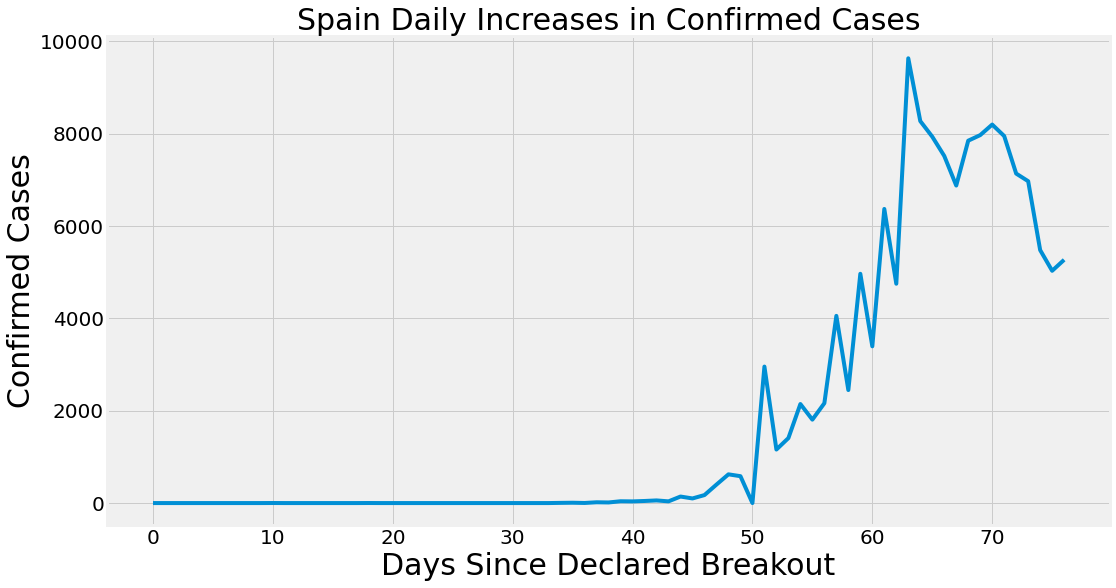

In [105]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, spainDailyIncrease)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

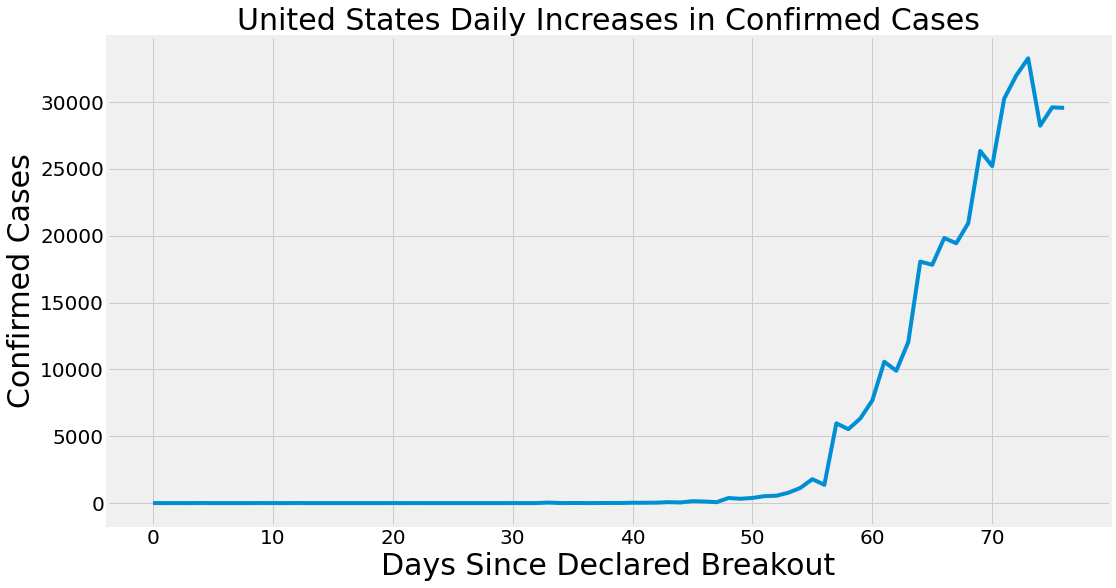

In [106]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, usDailyIncrease)
plt.title('United States Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

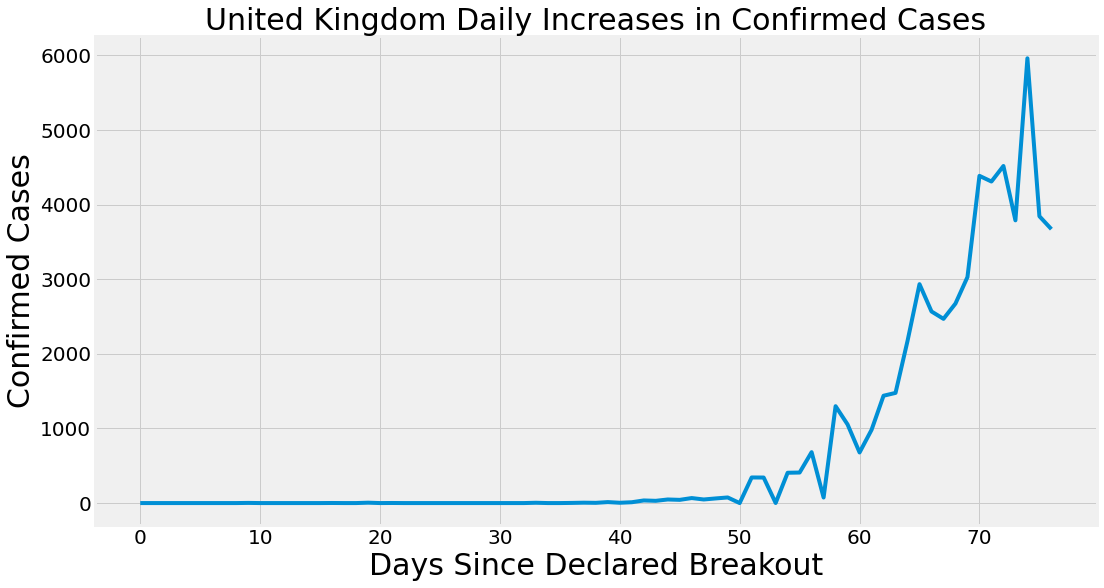

In [107]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, ukDailyIncrease)
plt.title('United Kingdom Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

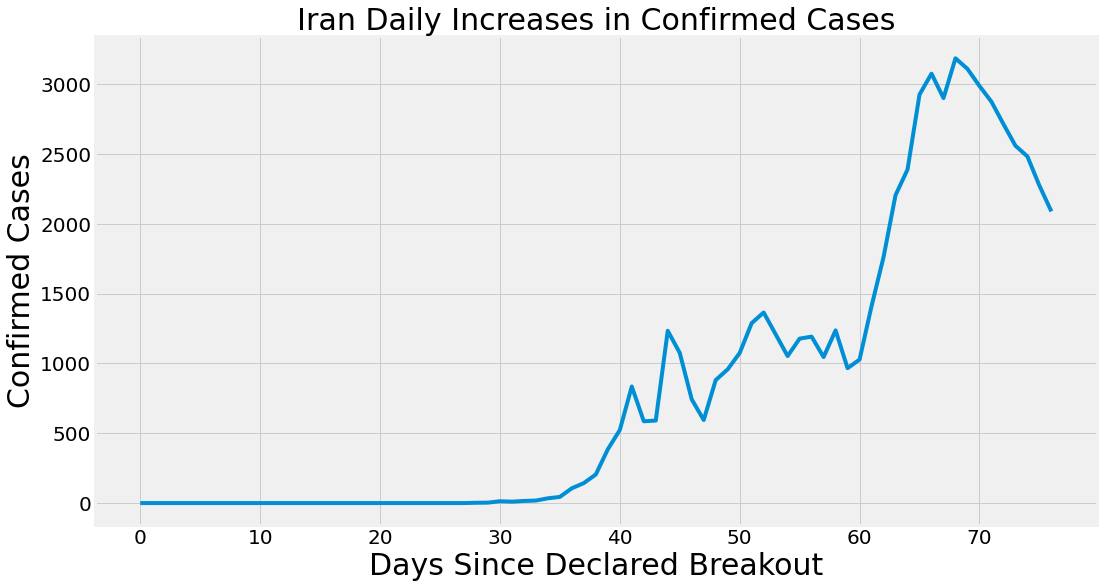

In [108]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, iranDailyIncrease)
plt.title('Iran Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

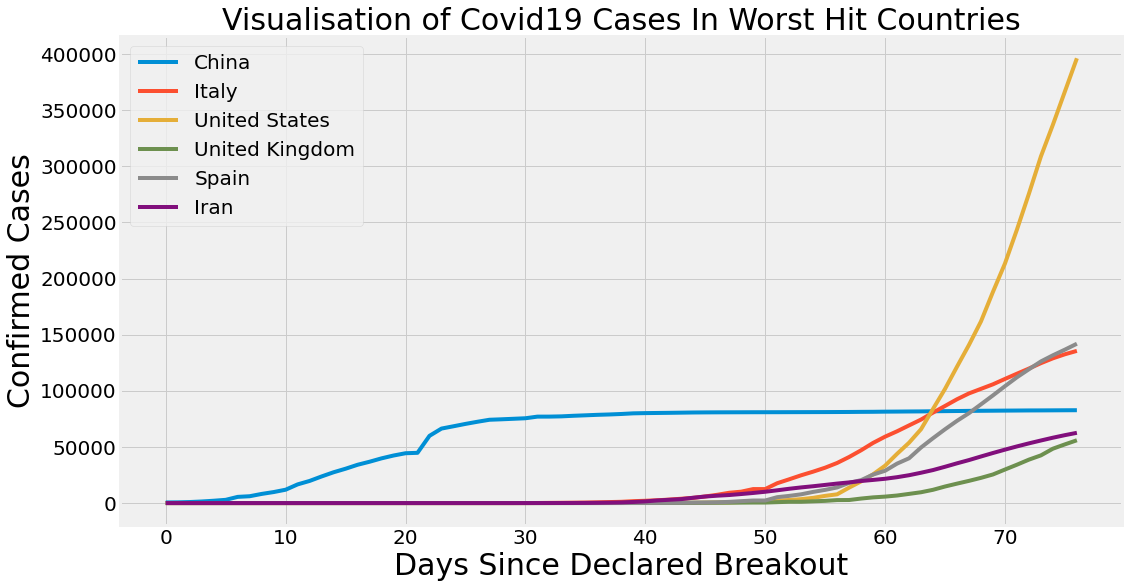

In [109]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, chinaCases)
plt.plot(adjustedDates, italyCases)
plt.plot(adjustedDates, usCases)
plt.plot(adjustedDates, ukCases)
plt.plot(adjustedDates, spainCases)
plt.plot(adjustedDates, iranCases)
plt.title('Visualisation of Covid19 Cases In Worst Hit Countries', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['China', 'Italy', 'United States', 'United Kingdom', 'Spain', 'Iran'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

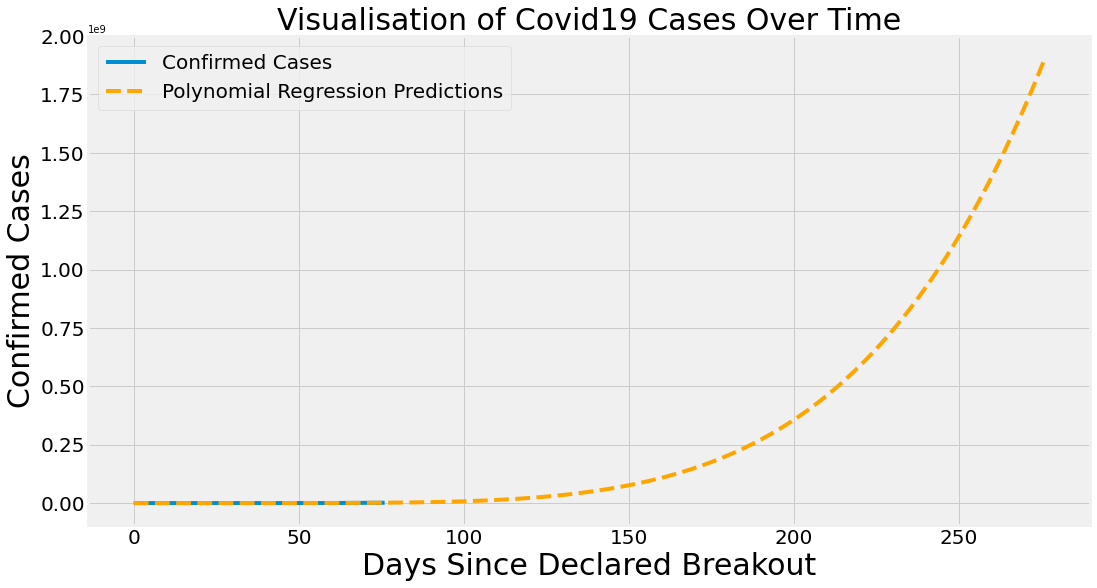

In [110]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, worldCases)
plt.plot(forecastFuture, linearPred, linestyle='dashed', color='orange')
plt.title('Visualisation of Covid19 Cases Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

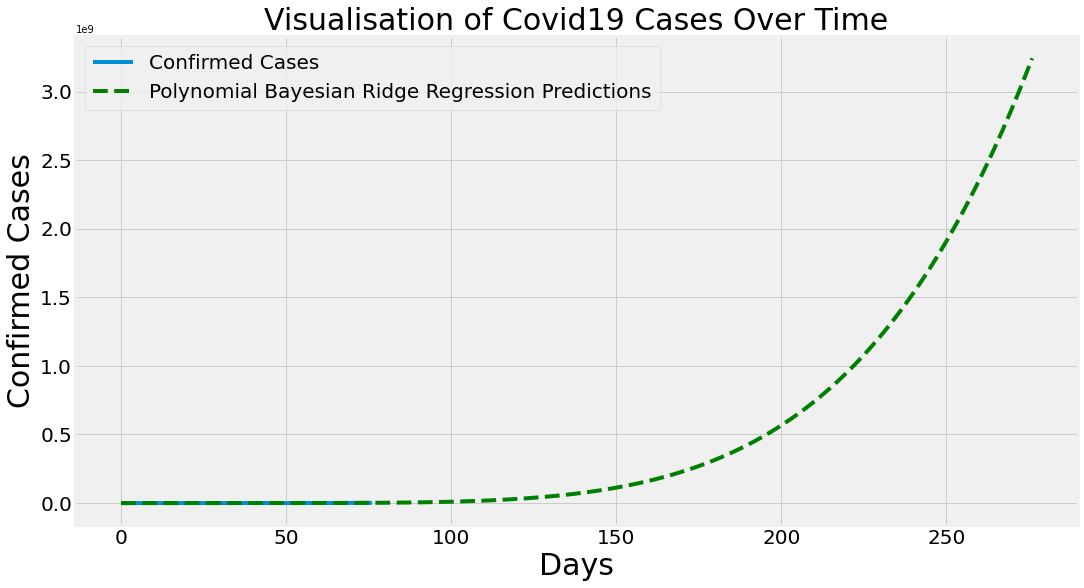

In [111]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, worldCases)
plt.plot(forecastFuture, bayesianPred, linestyle='dashed', color='green')
plt.title('Visualisation of Covid19 Cases Over Time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [112]:
# Future predictions using Polynomial Regression 
linearPred = linearPred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(forecastFutureDates[-10:], np.round(linearPred[-10:])))

Polynomial regression future predictions:


{('10/15/2020', 1606130738.0),
 ('10/16/2020', 1637367595.0),
 ('10/17/2020', 1669085222.0),
 ('10/18/2020', 1701289103.0),
 ('10/19/2020', 1733984766.0),
 ('10/20/2020', 1767177776.0),
 ('10/21/2020', 1800873743.0),
 ('10/22/2020', 1835078316.0),
 ('10/23/2020', 1869797187.0),
 ('10/24/2020', 1905036091.0)}

In [113]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(forecastFutureDates[-10:], np.round(bayesianPred[-10:])))

Ridge regression future predictions:


{('10/15/2020', 2715694742.0),
 ('10/16/2020', 2770591877.0),
 ('10/17/2020', 2826371049.0),
 ('10/18/2020', 2883042818.0),
 ('10/19/2020', 2940617826.0),
 ('10/20/2020', 2999106801.0),
 ('10/21/2020', 3058520552.0),
 ('10/22/2020', 3118869977.0),
 ('10/23/2020', 3180166054.0),
 ('10/24/2020', 3242419852.0)}

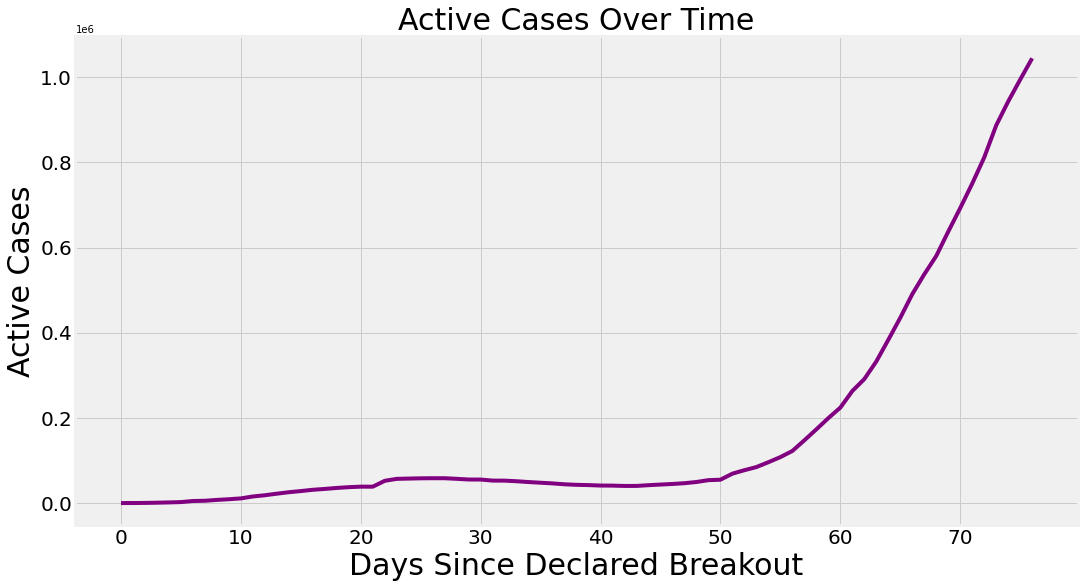

In [114]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalActive, color='purple')
plt.title('Active Cases Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

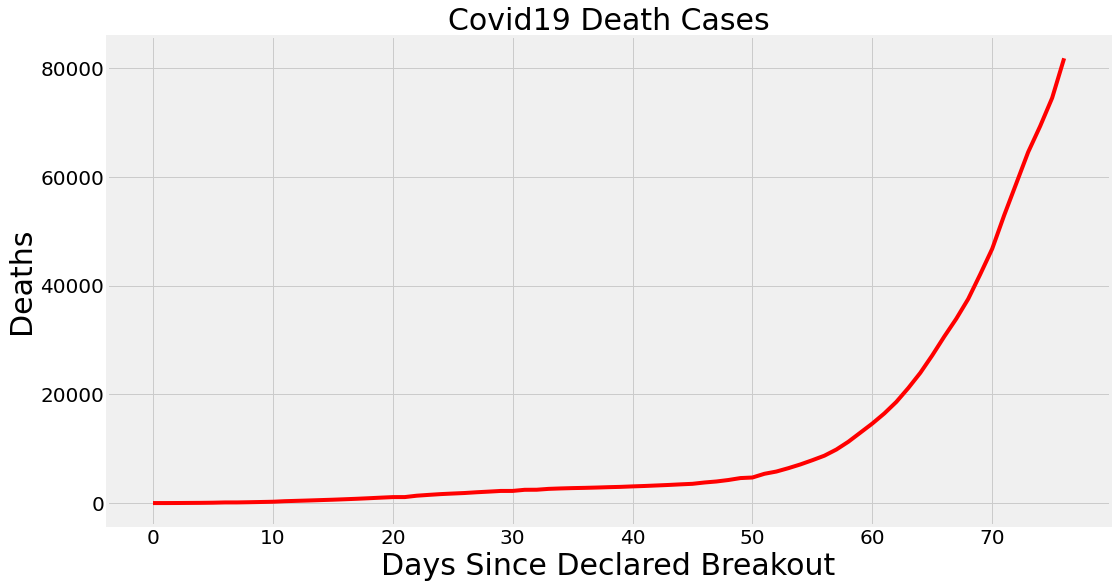

In [115]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.title('Covid19 Death Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

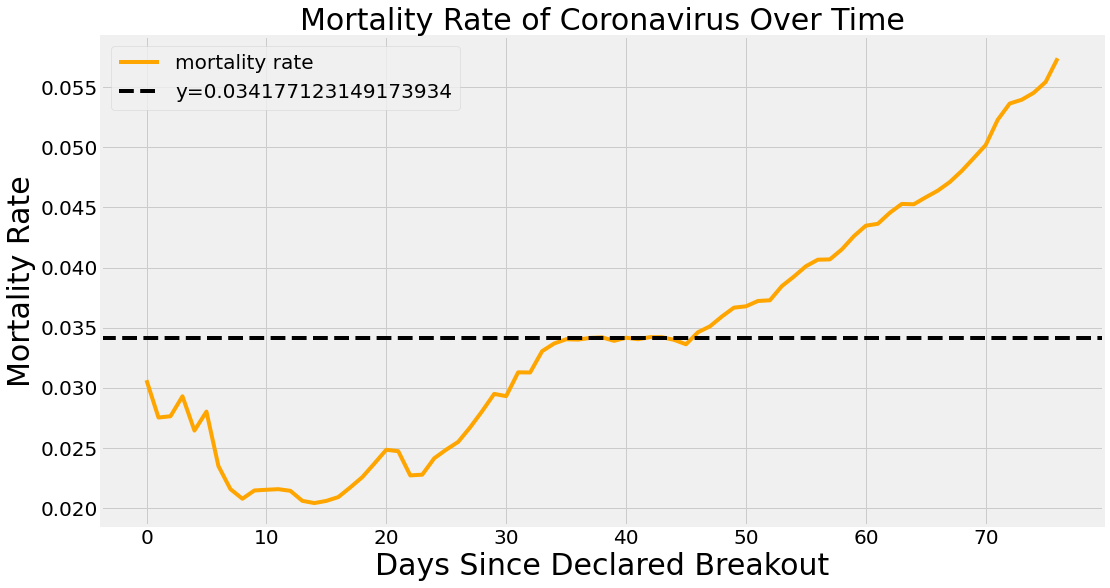

In [116]:
meanMortalityRate = np.mean(mortalityRate)
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, mortalityRate, color='orange')
plt.axhline(y = meanMortalityRate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(meanMortalityRate)], prop={'size': 20})
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

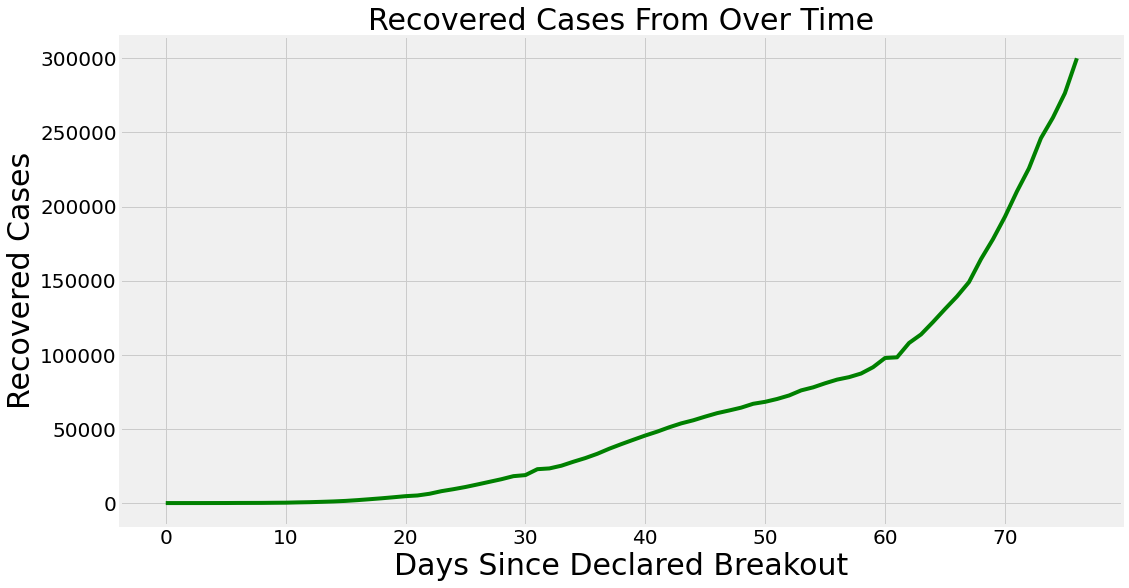

In [117]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalRecovered, color='green')
plt.title('Recovered Cases From Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Recovered Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

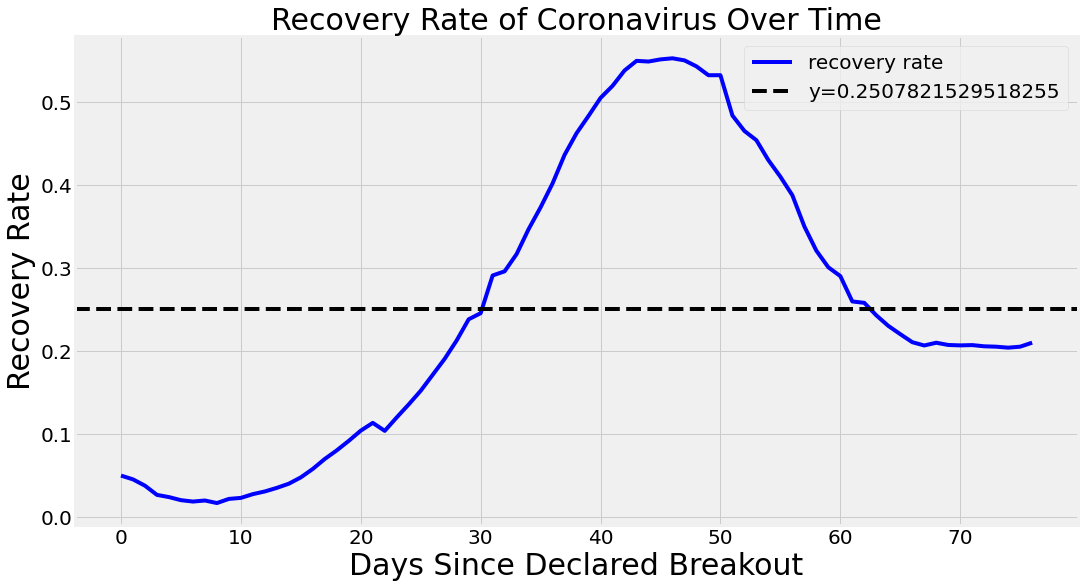

In [118]:
meanRecoveryRate = np.mean(recoveryRate)
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, recoveryRate, color='blue')
plt.axhline(y = meanRecoveryRate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(meanRecoveryRate)], prop={'size': 20})
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Comparing the number of recoveries against the number of deaths

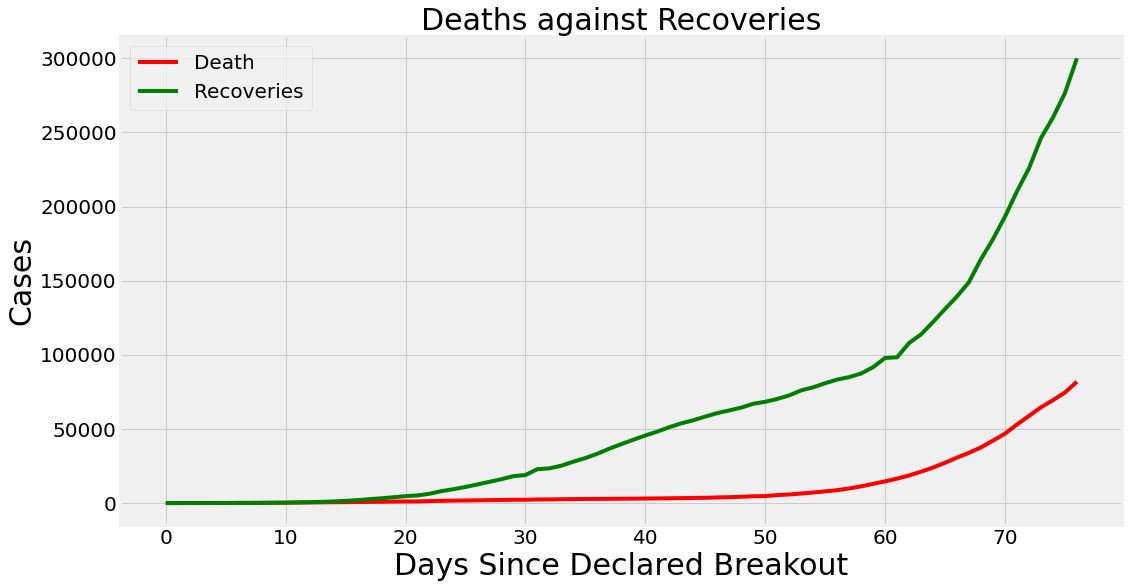

In [119]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.plot(adjustedDates, totalRecovered, color='green')
plt.legend(['Death', 'Recoveries'], loc='best', fontsize=20)
plt.title('Deaths against Recoveries', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Plotting the number of deaths against the number of recoveries

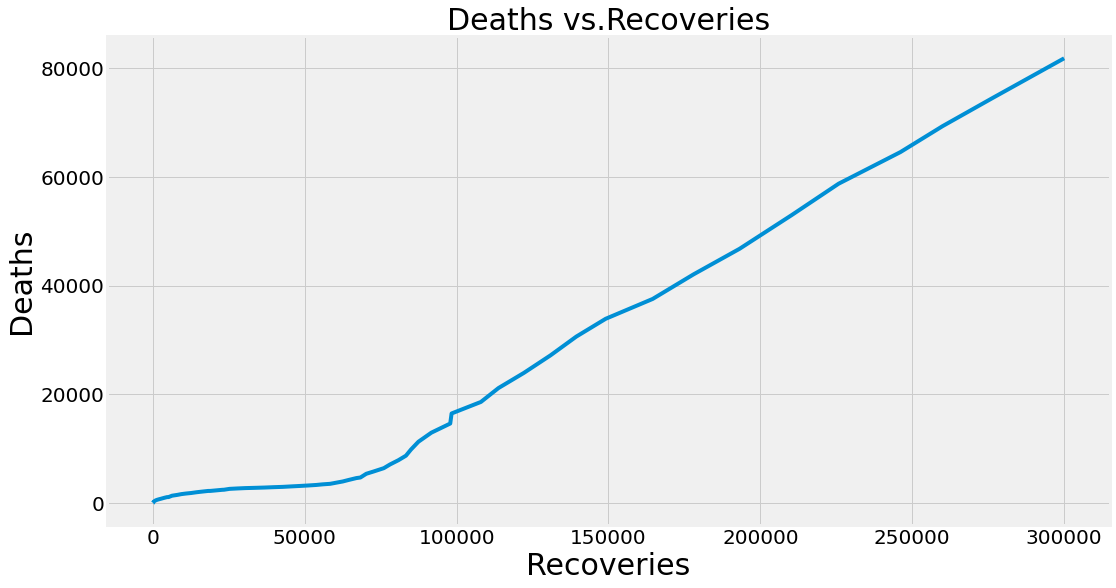

In [120]:
plt.figure(figsize=(16, 9))
plt.plot(totalRecovered, totalDeaths)
plt.title('Deaths vs.Recoveries', size=30)
plt.xlabel('Recoveries', size=30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()